In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from Pytorch_dataset import Predictor1_dataset
from Discharge_model import Predictor_1
from Predictor1_train import train_model, loss_plot, model_evaluate
from torch.utils.tensorboard import SummaryWriter

c:\Users\smcmlab4\Anaconda3\envs\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

writer = SummaryWriter('runs/predictor1_structure')
model = Predictor_1(in_ch=8, out_ch=1).cuda()
train_dataset = Predictor1_dataset(train=True, norm=True, cycle_length=100, set_code='seed0')
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)
# draw model graph
example = iter(train_loader)
d, t = next(example)
print(d.shape, t.shape)
writer.add_graph(model, d.cuda())
writer.close()

torch.Size([5, 8, 100]) torch.Size([5, 2])


In [2]:
batch_size = 100
# load dataset
train_dataset = Predictor1_dataset(train=True, norm=True, padding=True, set_code='seed0')
test_dataset = Predictor1_dataset(train=False, norm=True, padding=False, set_code='seed0')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

cuda is available
[Epoch 1/500] train_loss: 109272.71, valid_loss: 53419.58
Validation loss decreased (inf --> 53419.578125).  Saving model ...
[Epoch 2/500] train_loss: 6688.82, valid_loss: 40799.41
Validation loss decreased (53419.578125 --> 40799.410156).  Saving model ...
[Epoch 3/500] train_loss: 5127.21, valid_loss: 100892.02
EarlyStopping counter: 1 out of 50
[Epoch 4/500] train_loss: 4935.95, valid_loss: 38364.20
Validation loss decreased (40799.410156 --> 38364.199219).  Saving model ...
[Epoch 5/500] train_loss: 4594.97, valid_loss: 51748.64
EarlyStopping counter: 1 out of 50
[Epoch 6/500] train_loss: 4031.19, valid_loss: 48855.30
EarlyStopping counter: 2 out of 50
[Epoch 7/500] train_loss: 3529.73, valid_loss: 53656.55
EarlyStopping counter: 3 out of 50
[Epoch 8/500] train_loss: 3229.65, valid_loss: 61184.82
EarlyStopping counter: 4 out of 50
[Epoch 9/500] train_loss: 3022.17, valid_loss: 72011.49
EarlyStopping counter: 5 out of 50
[Epoch 10/500] train_loss: 3012.15, valid_l

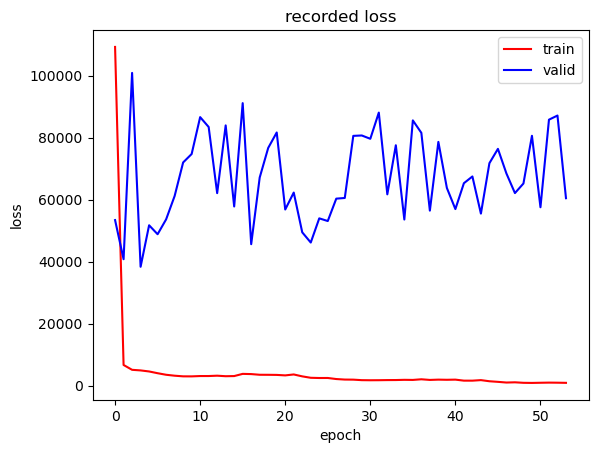

In [3]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_19')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=50, lr=1e-2, cosine_period=10, min_lr=1e-6, weight_decay=5*1e-4)

file = 'Model/predictor1_seed0_19.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 71.00, MAPE: 0.07
Testing set|RMSE: 195.87, MAPE: 0.20


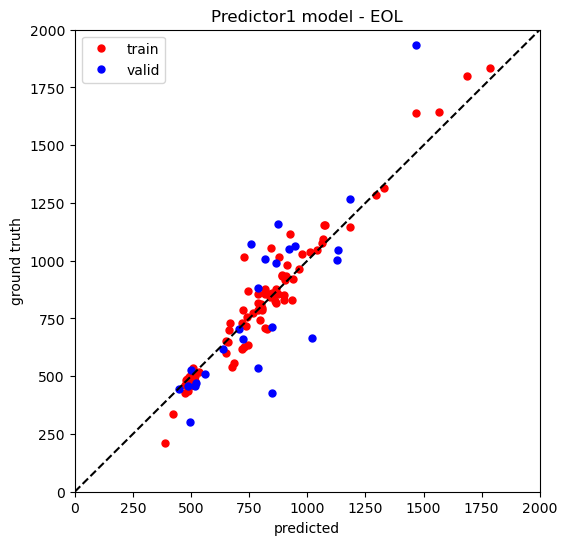

Training set|RMSE: 1.98, MAPE: 0.08
Testing set|RMSE: 2.35, MAPE: 0.09


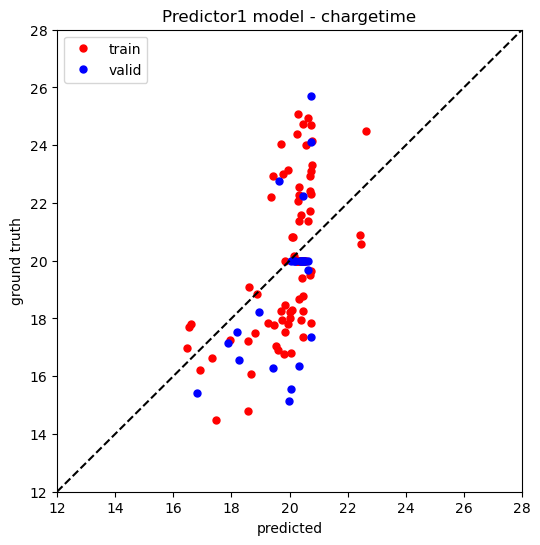

In [3]:
FILE = 'Model/predictor1_seed0_19.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, model_num=1, set_code='seed0', pred_target='EOL')
model_evaluate(model, model_num=1, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/500] train_loss: 343839.65, valid_loss: 765894.38
Validation loss decreased (inf --> 765894.375000).  Saving model ...
[Epoch 2/500] train_loss: 337606.27, valid_loss: 761753.88
Validation loss decreased (765894.375000 --> 761753.875000).  Saving model ...
[Epoch 3/500] train_loss: 310794.05, valid_loss: 715490.38
Validation loss decreased (761753.875000 --> 715490.375000).  Saving model ...
[Epoch 4/500] train_loss: 282453.24, valid_loss: 638238.94
Validation loss decreased (715490.375000 --> 638238.937500).  Saving model ...
[Epoch 5/500] train_loss: 260418.66, valid_loss: 577627.25
Validation loss decreased (638238.937500 --> 577627.250000).  Saving model ...
[Epoch 6/500] train_loss: 243046.01, valid_loss: 536047.50
Validation loss decreased (577627.250000 --> 536047.500000).  Saving model ...
[Epoch 7/500] train_loss: 230807.70, valid_loss: 513573.66
Validation loss decreased (536047.500000 --> 513573.656250).  Saving model ...
[Epoch 8/500] train_loss: 

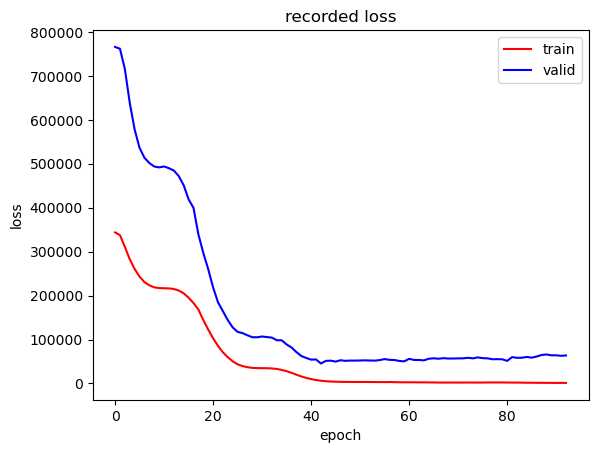

In [4]:
batch_size = 500
# load dataset
train_dataset = Predictor1_dataset(train=True, norm=True, padding=True, set_code='seed0')
test_dataset = Predictor1_dataset(train=False, norm=True, padding=False, set_code='seed0')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_20')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=50, lr=1e-3, cosine_period=10, min_lr=1e-6, weight_decay=5*1e-4)

file = 'Model/predictor1_seed0_20.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 89.65, MAPE: 0.08
Testing set|RMSE: 213.34, MAPE: 0.22


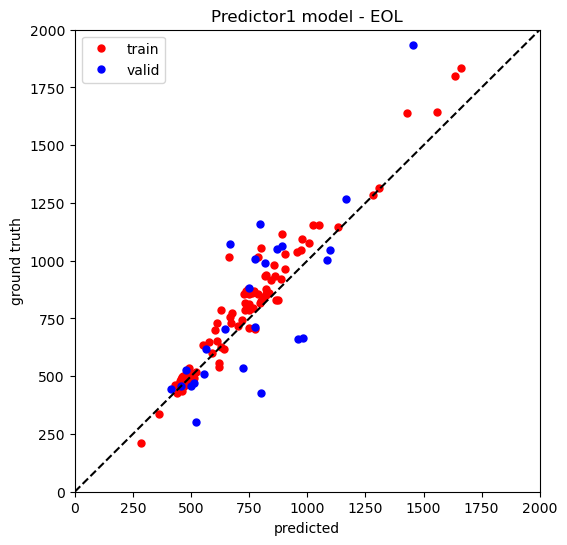

Training set|RMSE: 1.90, MAPE: 0.07
Testing set|RMSE: 2.14, MAPE: 0.08


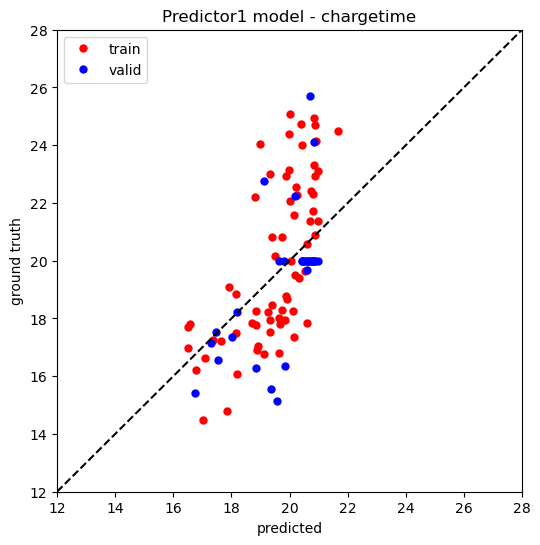

In [5]:
FILE = 'Model/predictor1_seed0_20.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, model_num=20, set_code='seed0', pred_target='EOL')
model_evaluate(model, model_num=20, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/500] train_loss: 306429.59, valid_loss: 580226.54
Validation loss decreased (inf --> 580226.541250).  Saving model ...
[Epoch 2/500] train_loss: 194342.29, valid_loss: 360645.85
Validation loss decreased (580226.541250 --> 360645.847500).  Saving model ...
[Epoch 3/500] train_loss: 98146.30, valid_loss: 180488.91
Validation loss decreased (360645.847500 --> 180488.906562).  Saving model ...
[Epoch 4/500] train_loss: 37931.72, valid_loss: 113356.13
Validation loss decreased (180488.906562 --> 113356.126250).  Saving model ...
[Epoch 5/500] train_loss: 12823.35, valid_loss: 70345.97
Validation loss decreased (113356.126250 --> 70345.970625).  Saving model ...
[Epoch 6/500] train_loss: 6924.23, valid_loss: 66507.92
Validation loss decreased (70345.970625 --> 66507.921094).  Saving model ...
[Epoch 7/500] train_loss: 5034.67, valid_loss: 63280.52
Validation loss decreased (66507.921094 --> 63280.524063).  Saving model ...
[Epoch 8/500] train_loss: 4116.16, valid_

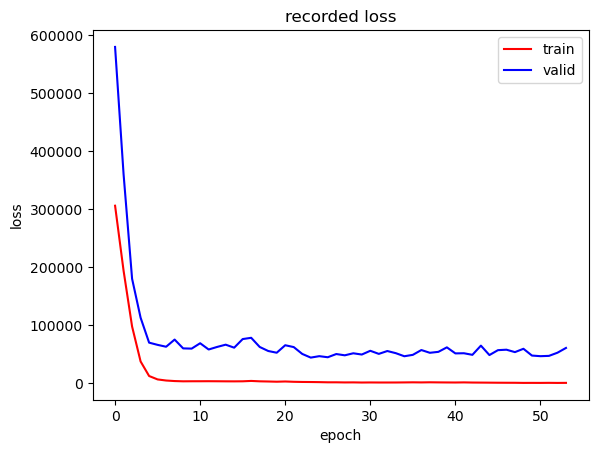

In [2]:
batch_size = 100
# load dataset
train_dataset = Predictor1_dataset(train=True, norm=True, padding=True, set_code='seed0')
test_dataset = Predictor1_dataset(train=False, norm=True, padding=True, set_code='seed0')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_21')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=30, lr=1e-3, cosine_period=10, min_lr=1e-6, weight_decay=5*1e-4)

file = 'Model/predictor1_seed0_21.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 63.16, MAPE: 0.06
Testing set|RMSE: 210.52, MAPE: 0.22


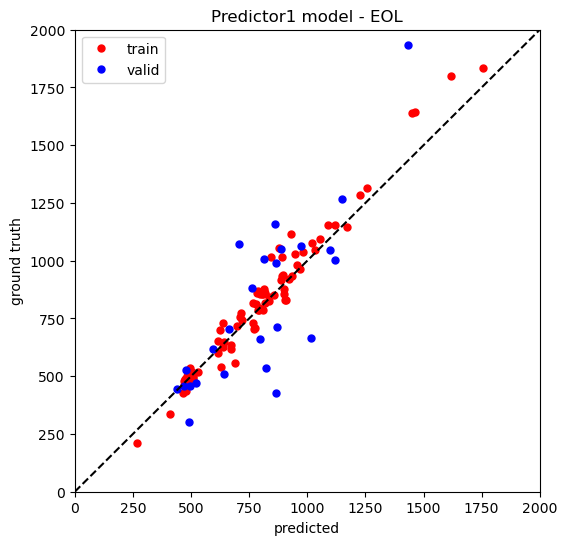

Training set|RMSE: 1.54, MAPE: 0.05
Testing set|RMSE: 1.68, MAPE: 0.07


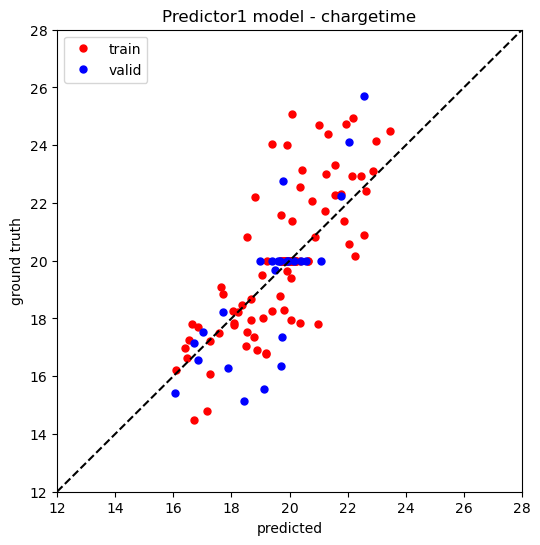

In [3]:
FILE = 'Model/predictor1_seed0_21.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, model_num=21, set_code='seed0', pred_target='EOL')
model_evaluate(model, model_num=21, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/500] train_loss: 311854.36, valid_loss: 589028.13
Validation loss decreased (inf --> 589028.127500).  Saving model ...
[Epoch 2/500] train_loss: 185934.78, valid_loss: 330837.10
Validation loss decreased (589028.127500 --> 330837.103750).  Saving model ...
[Epoch 3/500] train_loss: 87621.61, valid_loss: 155301.31
Validation loss decreased (330837.103750 --> 155301.314688).  Saving model ...
[Epoch 4/500] train_loss: 35900.70, valid_loss: 99085.45
Validation loss decreased (155301.314688 --> 99085.450938).  Saving model ...
[Epoch 5/500] train_loss: 14926.56, valid_loss: 84369.56
Validation loss decreased (99085.450938 --> 84369.557969).  Saving model ...
[Epoch 6/500] train_loss: 8155.17, valid_loss: 52417.33
Validation loss decreased (84369.557969 --> 52417.334844).  Saving model ...
[Epoch 7/500] train_loss: 5338.52, valid_loss: 50278.67
Validation loss decreased (52417.334844 --> 50278.666250).  Saving model ...
[Epoch 8/500] train_loss: 4920.50, valid_los

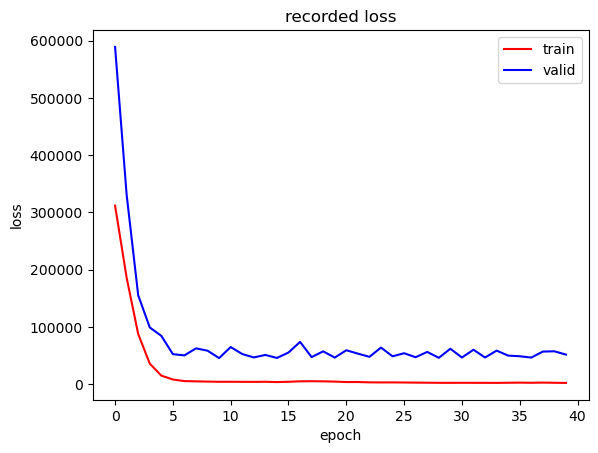

In [4]:
batch_size = 100
# load dataset
train_dataset = Predictor1_dataset(train=True, norm=True, padding=True, set_code='seed0')
test_dataset = Predictor1_dataset(train=False, norm=True, padding=True, set_code='seed0')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_22')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=30, lr=1e-3, cosine_period=10, min_lr=1e-6, weight_decay=1e-3)

file = 'Model/predictor1_seed0_22.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 92.06, MAPE: 0.08
Testing set|RMSE: 213.77, MAPE: 0.22


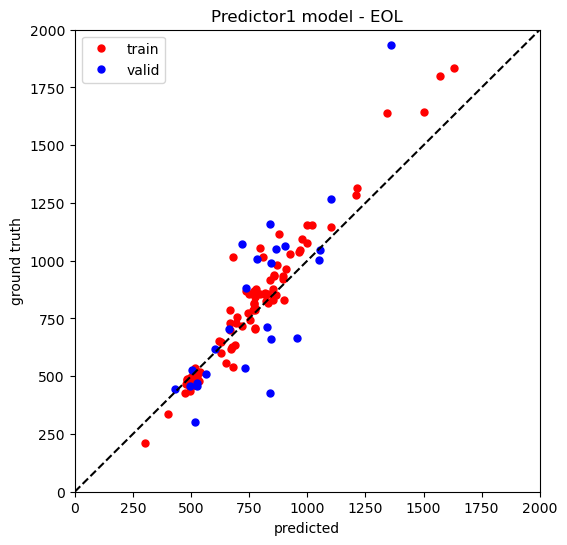

Training set|RMSE: 1.89, MAPE: 0.07
Testing set|RMSE: 2.31, MAPE: 0.09


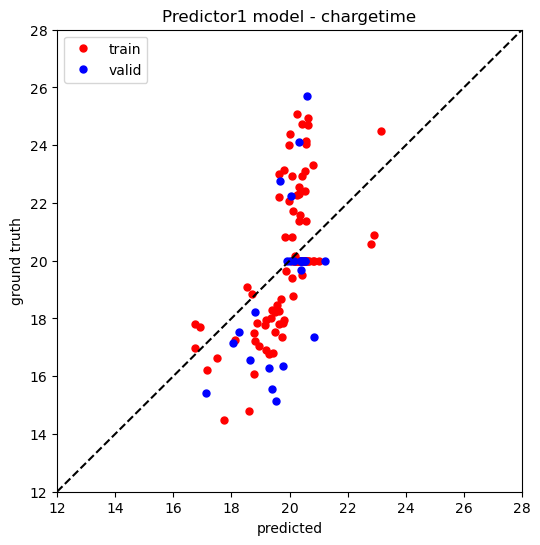

In [5]:
FILE = 'Model/predictor1_seed0_22.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, model_num=22, set_code='seed0', pred_target='EOL')
model_evaluate(model, model_num=22, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/500] train_loss: 303137.12, valid_loss: 557200.21
Validation loss decreased (inf --> 557200.211250).  Saving model ...
[Epoch 2/500] train_loss: 174981.64, valid_loss: 295716.31
Validation loss decreased (557200.211250 --> 295716.308750).  Saving model ...
[Epoch 3/500] train_loss: 78648.63, valid_loss: 152654.50
Validation loss decreased (295716.308750 --> 152654.499688).  Saving model ...
[Epoch 4/500] train_loss: 28965.46, valid_loss: 99812.54
Validation loss decreased (152654.499688 --> 99812.541250).  Saving model ...
[Epoch 5/500] train_loss: 11897.60, valid_loss: 62047.96
Validation loss decreased (99812.541250 --> 62047.961719).  Saving model ...
[Epoch 6/500] train_loss: 6093.11, valid_loss: 58540.80
Validation loss decreased (62047.961719 --> 58540.797500).  Saving model ...
[Epoch 7/500] train_loss: 4924.69, valid_loss: 52216.80
Validation loss decreased (58540.797500 --> 52216.802031).  Saving model ...
[Epoch 8/500] train_loss: 4197.97, valid_los

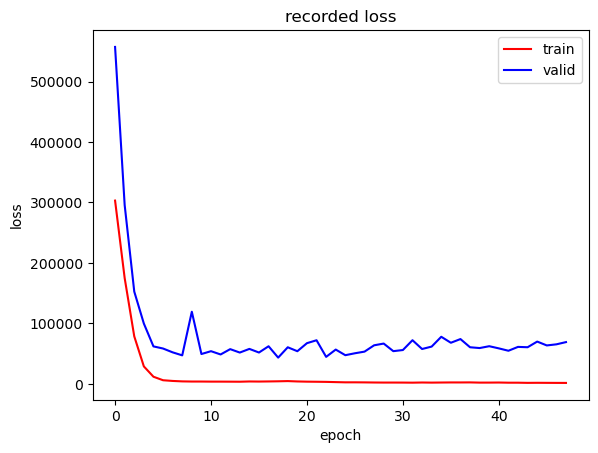

In [6]:
batch_size = 100
# load dataset
train_dataset = Predictor1_dataset(train=True, norm=True, padding=True, set_code='seed0')
test_dataset = Predictor1_dataset(train=False, norm=True, padding=True, set_code='seed0')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_23')
# load model
model = Predictor_1(in_ch=8, out_ch=1, drop=0.3).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=30, lr=1e-3, cosine_period=10, min_lr=1e-6, weight_decay=5*1e-4)

file = 'Model/predictor1_seed0_23.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 83.58, MAPE: 0.09
Testing set|RMSE: 208.51, MAPE: 0.23


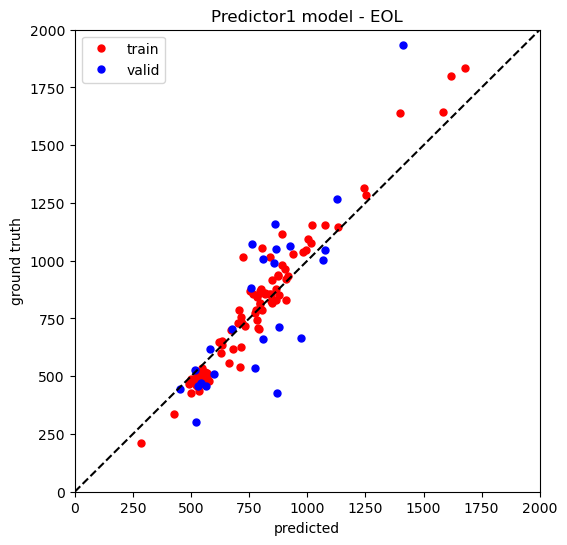

Training set|RMSE: 1.80, MAPE: 0.07
Testing set|RMSE: 2.46, MAPE: 0.10


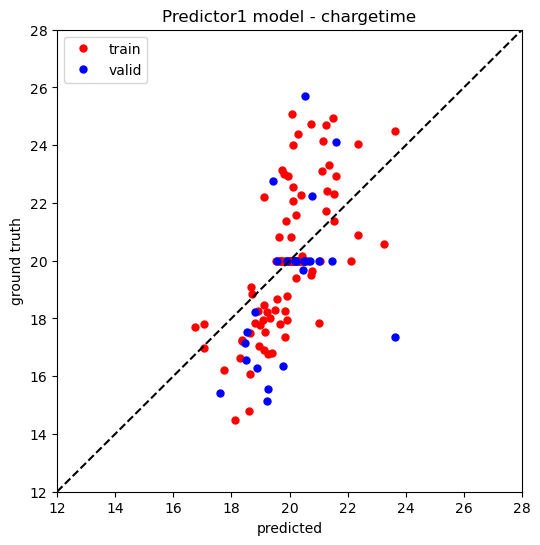

In [7]:
FILE = 'Model/predictor1_seed0_23.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, model_num=23, set_code='seed0', pred_target='EOL')
model_evaluate(model, model_num=23, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/500] train_loss: 295951.53, valid_loss: 625213.95
Validation loss decreased (inf --> 625213.953750).  Saving model ...
[Epoch 2/500] train_loss: 197346.58, valid_loss: 348729.14
Validation loss decreased (625213.953750 --> 348729.143750).  Saving model ...
[Epoch 3/500] train_loss: 90866.53, valid_loss: 199267.98
Validation loss decreased (348729.143750 --> 199267.981875).  Saving model ...
[Epoch 4/500] train_loss: 32643.92, valid_loss: 97927.03
Validation loss decreased (199267.981875 --> 97927.025938).  Saving model ...
[Epoch 5/500] train_loss: 11937.91, valid_loss: 67993.76
Validation loss decreased (97927.025938 --> 67993.758750).  Saving model ...
[Epoch 6/500] train_loss: 5537.86, valid_loss: 58158.65
Validation loss decreased (67993.758750 --> 58158.645937).  Saving model ...
[Epoch 7/500] train_loss: 3889.99, valid_loss: 41888.37
Validation loss decreased (58158.645937 --> 41888.370469).  Saving model ...
[Epoch 8/500] train_loss: 3857.24, valid_los

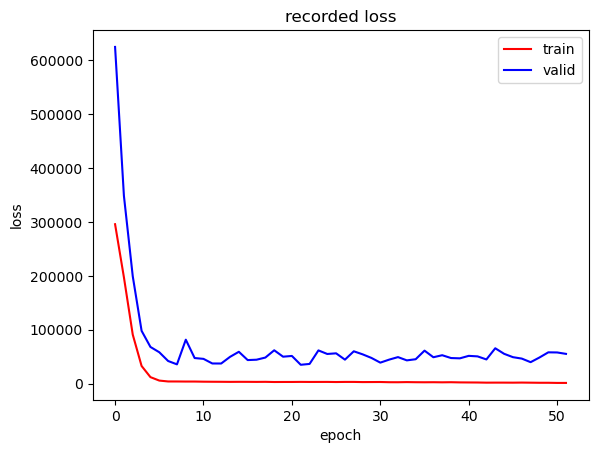

In [2]:
batch_size = 100
# load dataset
train_dataset = Predictor1_dataset(train=True, norm=True, padding=True, set_code='seed0')
test_dataset = Predictor1_dataset(train=False, norm=True, padding=True, set_code='seed0')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_24')
# load model
model = Predictor_1(in_ch=8, out_ch=1, drop=0.3).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=30, lr=1e-3, cosine_period=20, min_lr=1e-6, weight_decay=5*1e-4)

file = 'Model/predictor1_seed0_24.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 64.22, MAPE: 0.07
Testing set|RMSE: 185.87, MAPE: 0.20


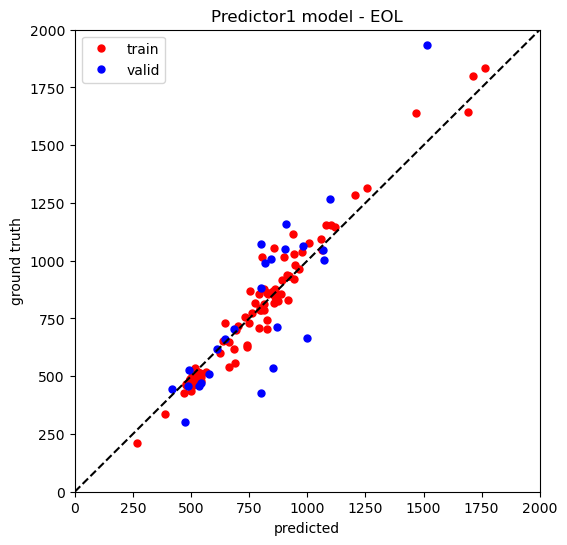

Training set|RMSE: 1.46, MAPE: 0.05
Testing set|RMSE: 1.81, MAPE: 0.07


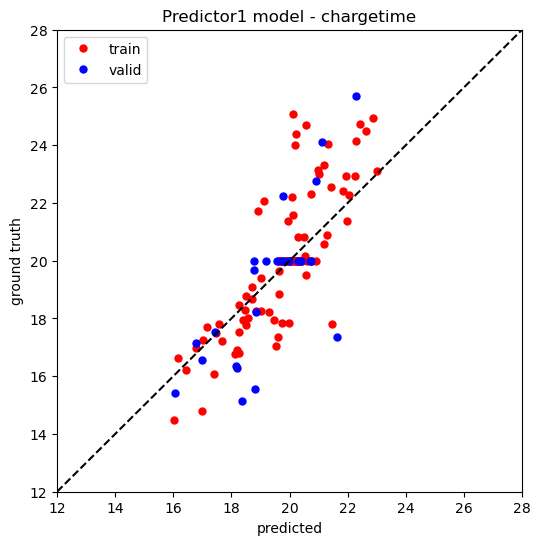

In [3]:
FILE = 'Model/predictor1_seed0_24.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, model_num=24, set_code='seed0', pred_target='EOL')
model_evaluate(model, model_num=24, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/500] train_loss: 351.430, valid_loss: 666.836
train_rmse: 764.80, valid_rmse: 756.13
Validation loss decreased (inf --> 666.835815).  Saving model ...
[Epoch 2/500] train_loss: 265.911, valid_loss: 462.590
train_rmse: 688.15, valid_rmse: 665.01
Validation loss decreased (666.835815 --> 462.589508).  Saving model ...
[Epoch 3/500] train_loss: 152.959, valid_loss: 271.902
train_rmse: 593.76, valid_rmse: 568.10
Validation loss decreased (462.589508 --> 271.902069).  Saving model ...
[Epoch 4/500] train_loss: 64.954, valid_loss: 171.563
train_rmse: 498.02, valid_rmse: 488.22
Validation loss decreased (271.902069 --> 171.563400).  Saving model ...
[Epoch 5/500] train_loss: 42.014, valid_loss: 172.432
train_rmse: 422.86, valid_rmse: 436.82
EarlyStopping counter: 1 out of 30
[Epoch 6/500] train_loss: 36.494, valid_loss: 180.688
train_rmse: 369.49, valid_rmse: 403.32
EarlyStopping counter: 2 out of 30
[Epoch 7/500] train_loss: 32.136, valid_loss: 162.599
train_rmse: 

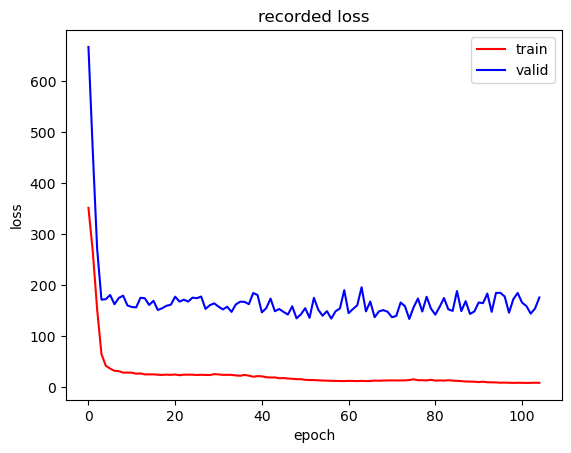

In [4]:
batch_size = 100
# load dataset
train_dataset = Predictor1_dataset(train=True, norm=True, padding=True, set_code='seed0')
test_dataset = Predictor1_dataset(train=False, norm=True, padding=False, set_code='seed0')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=25, shuffle=True)

# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_25')
# load model
model = Predictor_1(in_ch=8, out_ch=1, drop=0.3).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=30, lr=1e-3, cosine_period=20, min_lr=1e-6, weight_decay=5*1e-4)

file = 'Model/predictor1_seed0_25.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 69.17, MAPE: 0.06
Testing set|RMSE: 183.10, MAPE: 0.18


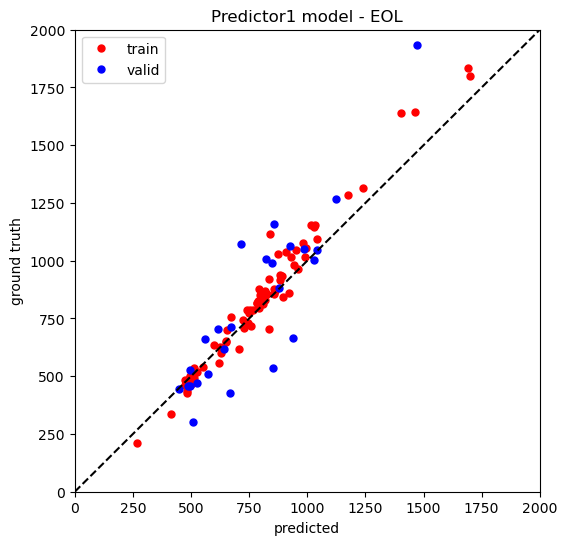

Training set|RMSE: 0.85, MAPE: 0.03
Testing set|RMSE: 1.78, MAPE: 0.07


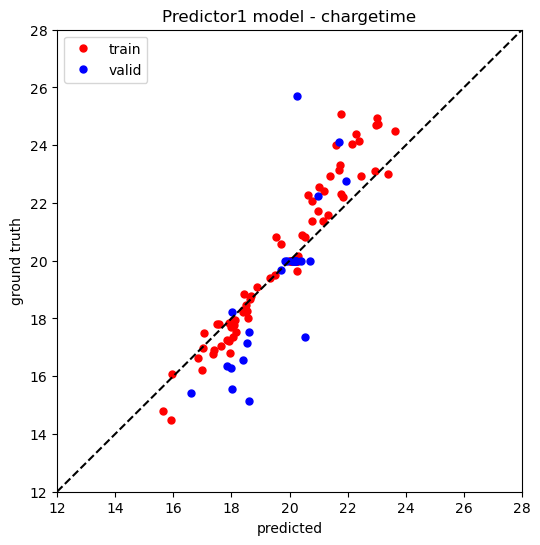

In [5]:
FILE = 'Model/predictor1_seed0_25.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, model_num=25, set_code='seed0', pred_target='EOL')
model_evaluate(model, model_num=25, set_code='seed0', pred_target='chargetime')

# Repreprocess

cuda is available
[Epoch 1/500] train_loss: 222.623, valid_loss: 138.901
train_rmse: 520.70, valid_rmse: 207.67
Validation loss decreased (inf --> 138.900879).  Saving model ...
[Epoch 2/500] train_loss: 36.519, valid_loss: 134.507
train_rmse: 312.96, valid_rmse: 196.33
Validation loss decreased (138.900879 --> 134.506851).  Saving model ...
[Epoch 3/500] train_loss: 26.051, valid_loss: 130.057
train_rmse: 234.63, valid_rmse: 186.21
Validation loss decreased (134.506851 --> 130.056763).  Saving model ...
[Epoch 4/500] train_loss: 24.545, valid_loss: 111.002
train_rmse: 194.40, valid_rmse: 173.75
Validation loss decreased (130.056763 --> 111.002251).  Saving model ...
[Epoch 5/500] train_loss: 21.713, valid_loss: 135.182
train_rmse: 168.50, valid_rmse: 171.76
EarlyStopping counter: 1 out of 30
[Epoch 6/500] train_loss: 19.963, valid_loss: 103.161
train_rmse: 150.47, valid_rmse: 164.76
Validation loss decreased (111.002251 --> 103.161179).  Saving model ...
[Epoch 7/500] train_loss: 17.9

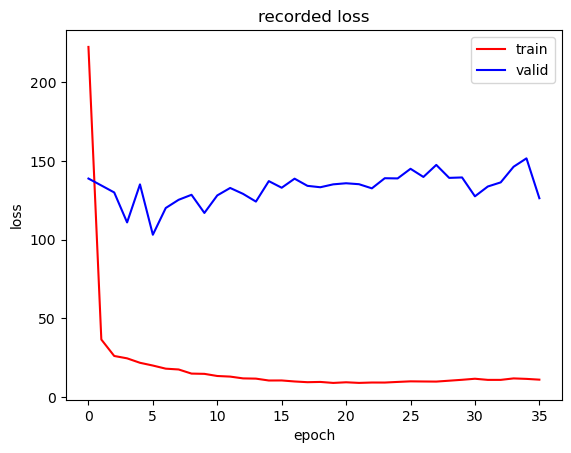

In [3]:
batch_size = 100
# load dataset
train_dataset = Predictor1_dataset(train=True, norm=True, padding=True, set_code='')
test_dataset = Predictor1_dataset(train=False, norm=True, padding=False, set_code='')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=23, shuffle=True)

# TensorBoard
writer = SummaryWriter('runs/predictor1_model1')
# load model
model = Predictor_1(in_ch=8, out_ch=1, drop=0.3).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=30, lr=5*1e-3, cosine_period=20, min_lr=1e-6, weight_decay=5*1e-4)

file = 'Model/predictor1_model1.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 32.18, MAPE: 0.03
Testing set|RMSE: 129.78, MAPE: 0.14


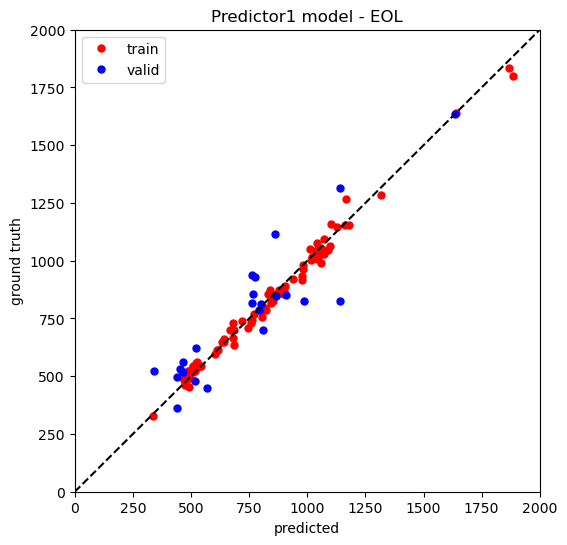

Training set|RMSE: 1.19, MAPE: 0.04
Testing set|RMSE: 1.58, MAPE: 0.06


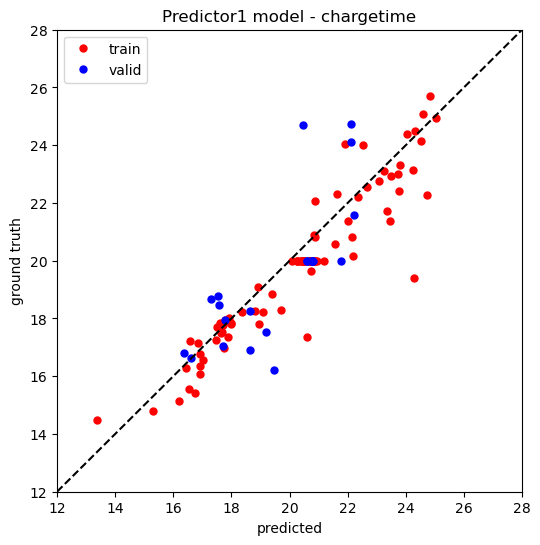

In [4]:
FILE = 'Model/predictor1_model1.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, model_num=1, set_code='', pred_target='EOL')
model_evaluate(model, model_num=1, set_code='', pred_target='chargetime')

cuda is available
[Epoch 1/500] train_loss: 215.327, valid_loss: 194.741
train_rmse: 509.33, valid_rmse: 282.01
Validation loss decreased (inf --> 194.740753).  Saving model ...
[Epoch 2/500] train_loss: 35.053, valid_loss: 114.841
train_rmse: 306.23, valid_rmse: 221.92
Validation loss decreased (194.740753 --> 114.841057).  Saving model ...
[Epoch 3/500] train_loss: 26.615, valid_loss: 155.701
train_rmse: 230.35, valid_rmse: 210.74
EarlyStopping counter: 1 out of 30
[Epoch 4/500] train_loss: 23.369, valid_loss: 112.034
train_rmse: 190.24, valid_rmse: 194.08
Validation loss decreased (114.841057 --> 112.034470).  Saving model ...
[Epoch 5/500] train_loss: 21.082, valid_loss: 100.113
train_rmse: 164.78, valid_rmse: 181.65
Validation loss decreased (112.034470 --> 100.113106).  Saving model ...
[Epoch 6/500] train_loss: 19.124, valid_loss: 137.807
train_rmse: 147.07, valid_rmse: 178.69
EarlyStopping counter: 1 out of 30
[Epoch 7/500] train_loss: 17.894, valid_loss: 133.339
train_rmse: 13

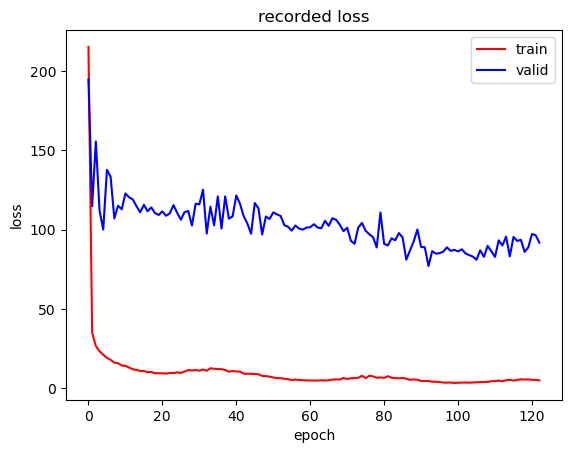

In [10]:
batch_size = 100
# load dataset
train_dataset = Predictor1_dataset(train=True, norm=True, padding=True, set_code='')
test_dataset = Predictor1_dataset(train=False, norm=True, padding=False, set_code='')

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=23, shuffle=True)

# TensorBoard
writer = SummaryWriter('runs/predictor1_model2')
# load model
model = Predictor_1(in_ch=8, out_ch=1, drop=0.2).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=30, lr=5*1e-3, cosine_period=20, min_lr=1e-6, weight_decay=5*1e-4)

file = 'Model/predictor1_model2.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 7.35, MAPE: 0.01
Testing set|RMSE: 97.52, MAPE: 0.11


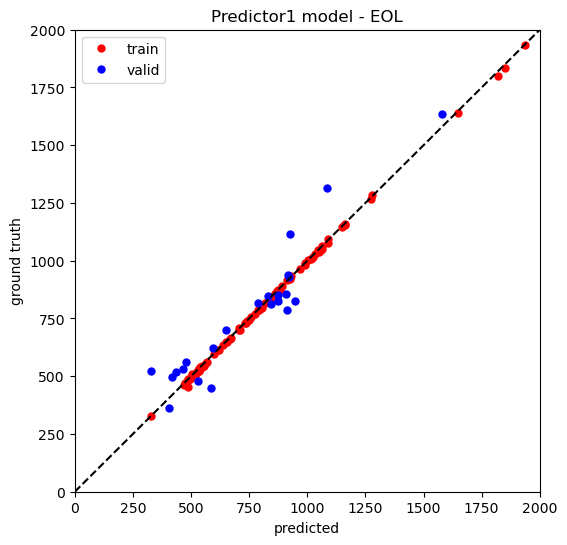

Training set|RMSE: 0.12, MAPE: 0.01
Testing set|RMSE: 1.22, MAPE: 0.04


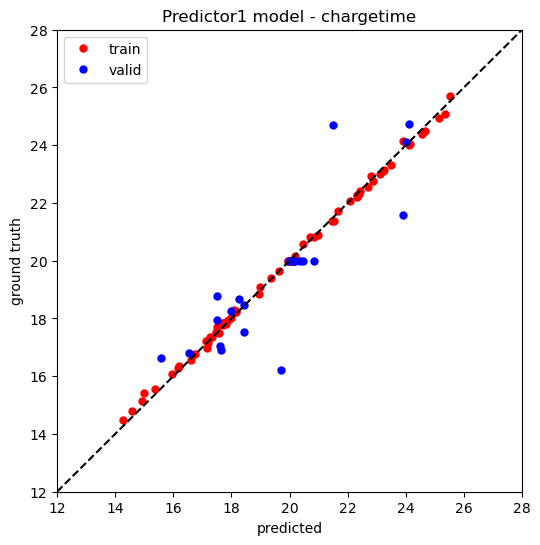

In [11]:
FILE = 'Model/predictor1_model2.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, norm=True, model_num=2, set_code='', pred_target='EOL')
model_evaluate(model, norm=True, model_num=2, set_code='', pred_target='chargetime')

cuda is available
[Epoch 1/500] train_loss: 218.421, valid_loss: 171.147
train_rmse: 515.33, valid_rmse: 219.24
Validation loss decreased (inf --> 171.146973).  Saving model ...
[Epoch 2/500] train_loss: 34.163, valid_loss: 131.583
train_rmse: 306.62, valid_rmse: 193.20
Validation loss decreased (171.146973 --> 131.583237).  Saving model ...
[Epoch 3/500] train_loss: 24.794, valid_loss: 126.989
train_rmse: 227.45, valid_rmse: 180.48
Validation loss decreased (131.583237 --> 126.988655).  Saving model ...
[Epoch 4/500] train_loss: 22.137, valid_loss: 116.562
train_rmse: 186.33, valid_rmse: 171.13
Validation loss decreased (126.988655 --> 116.562187).  Saving model ...
[Epoch 5/500] train_loss: 23.004, valid_loss: 116.338
train_rmse: 161.65, valid_rmse: 166.85
Validation loss decreased (116.562187 --> 116.338234).  Saving model ...
[Epoch 6/500] train_loss: 19.703, valid_loss: 114.803
train_rmse: 143.87, valid_rmse: 163.11
Validation loss decreased (116.338234 --> 114.803223).  Saving mo

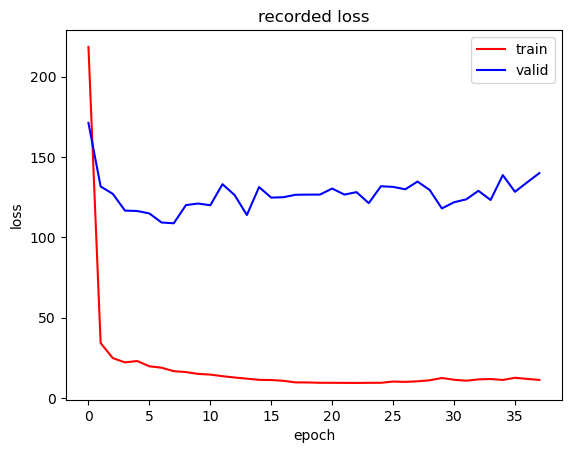

In [12]:
batch_size = 100
# load dataset
train_dataset = Predictor1_dataset(train=True, norm=True, padding=True, set_code='')
test_dataset = Predictor1_dataset(train=False, norm=True, padding=False, set_code='')

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=23, shuffle=True)

# TensorBoard
writer = SummaryWriter('runs/predictor1_model3')
# load model
model = Predictor_1(in_ch=8, out_ch=1, drop=0.2).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=30, lr=5*1e-3, cosine_period=20, min_lr=1e-6, weight_decay=1e-3)

file = 'Model/predictor1_model3.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 36.21, MAPE: 0.04
Testing set|RMSE: 146.53, MAPE: 0.14


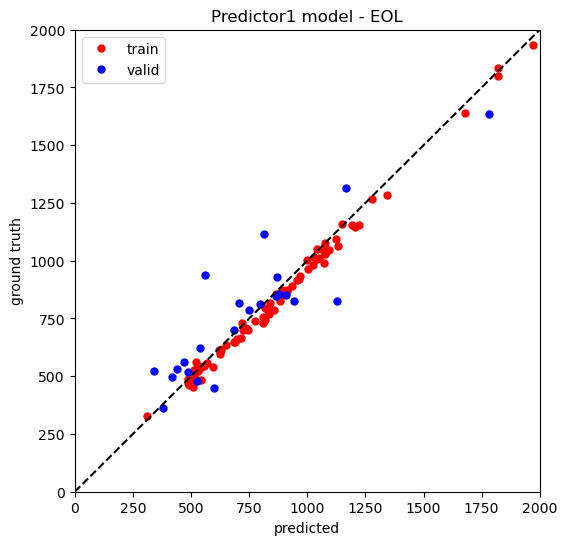

Training set|RMSE: 0.65, MAPE: 0.02
Testing set|RMSE: 1.07, MAPE: 0.04


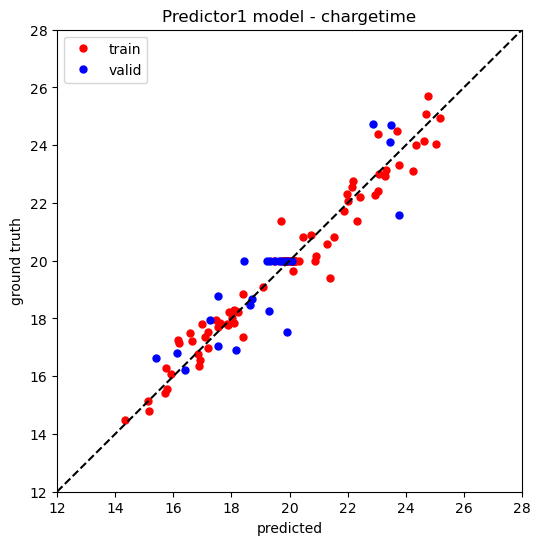

In [13]:
FILE = 'Model/predictor1_model3.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, norm=True, model_num=3, set_code='', pred_target='EOL')
model_evaluate(model, norm=True, model_num=3, set_code='', pred_target='chargetime')

cuda is available
[Epoch 1/500] train_loss: 224.513, valid_loss: 184.436
train_rmse: 522.61, valid_rmse: 241.98
Validation loss decreased (inf --> 184.435608).  Saving model ...
[Epoch 2/500] train_loss: 36.536, valid_loss: 114.223
train_rmse: 314.49, valid_rmse: 211.21
Validation loss decreased (184.435608 --> 114.222687).  Saving model ...
[Epoch 3/500] train_loss: 25.666, valid_loss: 98.766
train_rmse: 234.11, valid_rmse: 182.92
Validation loss decreased (114.222687 --> 98.765617).  Saving model ...
[Epoch 4/500] train_loss: 20.820, valid_loss: 116.008
train_rmse: 190.54, valid_rmse: 172.48
EarlyStopping counter: 1 out of 30
[Epoch 5/500] train_loss: 18.662, valid_loss: 113.203
train_rmse: 163.20, valid_rmse: 165.95
EarlyStopping counter: 2 out of 30
[Epoch 6/500] train_loss: 18.634, valid_loss: 110.229
train_rmse: 144.94, valid_rmse: 160.93
EarlyStopping counter: 3 out of 30
[Epoch 7/500] train_loss: 16.757, valid_loss: 107.078
train_rmse: 131.24, valid_rmse: 156.46
EarlyStopping c

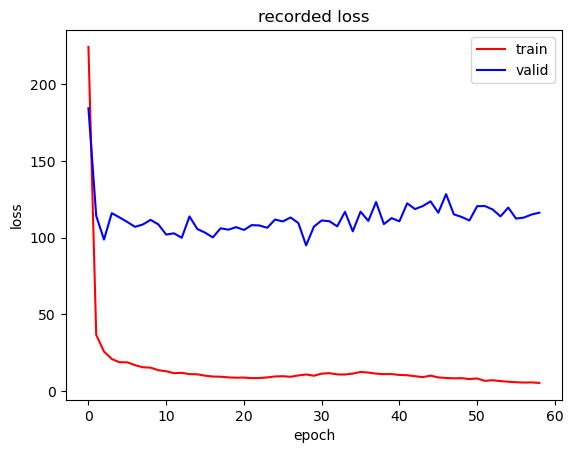

In [14]:
batch_size = 100
# load dataset
train_dataset = Predictor1_dataset(train=True, norm=True, padding=True, set_code='')
test_dataset = Predictor1_dataset(train=False, norm=True, padding=False, set_code='')

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=23, shuffle=True)

# TensorBoard
writer = SummaryWriter('runs/predictor1_model4')
# load model
model = Predictor_1(in_ch=8, out_ch=1, drop=0.17).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=30, lr=5*1e-3, cosine_period=20, min_lr=1e-6, weight_decay=5*1e-4)

file = 'Model/predictor1_model4.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 15.01, MAPE: 0.01
Testing set|RMSE: 118.55, MAPE: 0.13


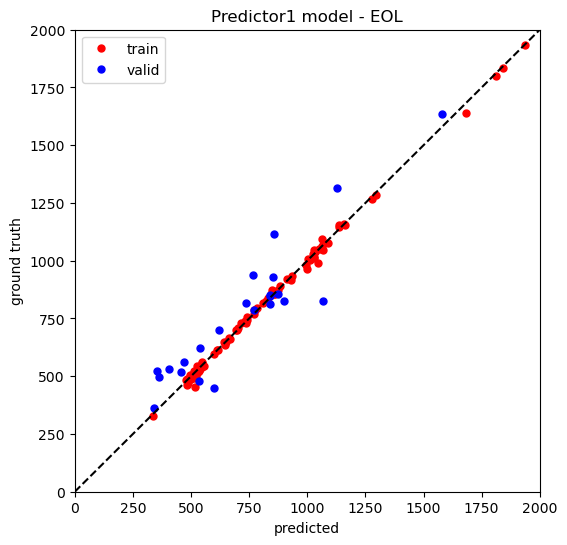

Training set|RMSE: 0.60, MAPE: 0.02
Testing set|RMSE: 1.70, MAPE: 0.06


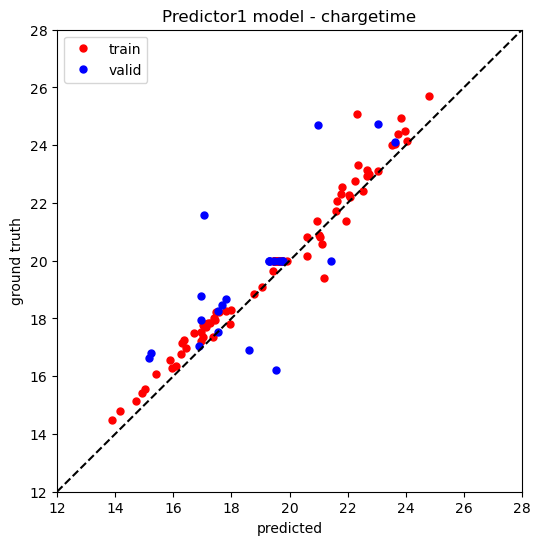

In [15]:
FILE = 'Model/predictor1_model4.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, norm=True, model_num=4, set_code='', pred_target='EOL')
model_evaluate(model, norm=True, model_num=4, set_code='', pred_target='chargetime')

# 100 cycle

In [2]:
batch_size = 5
# load dataset
train_dataset = Predictor1_dataset(train=True, norm=True, cycle_length=100, set_code='seed0')
test_dataset = Predictor1_dataset(train=False, norm=True, cycle_length=100, set_code='seed0')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

cuda is available
[Epoch 1/500] train_loss: 335288.86, valid_loss: 728444.80
Validation loss decreased (inf --> 728444.796875).  Saving model ...
[Epoch 2/500] train_loss: 312986.49, valid_loss: 662893.37
Validation loss decreased (728444.796875 --> 662893.368750).  Saving model ...
[Epoch 3/500] train_loss: 294942.38, valid_loss: 626695.39
Validation loss decreased (662893.368750 --> 626695.387500).  Saving model ...
[Epoch 4/500] train_loss: 278541.91, valid_loss: 616128.14
Validation loss decreased (626695.387500 --> 616128.140625).  Saving model ...
[Epoch 5/500] train_loss: 266326.42, valid_loss: 586431.25
Validation loss decreased (616128.140625 --> 586431.250000).  Saving model ...
[Epoch 6/500] train_loss: 253993.78, valid_loss: 548541.12
Validation loss decreased (586431.250000 --> 548541.115625).  Saving model ...
[Epoch 7/500] train_loss: 245978.74, valid_loss: 573352.52
EarlyStopping counter: 1 out of 50
[Epoch 8/500] train_loss: 238922.36, valid_loss: 537406.81
Validation 

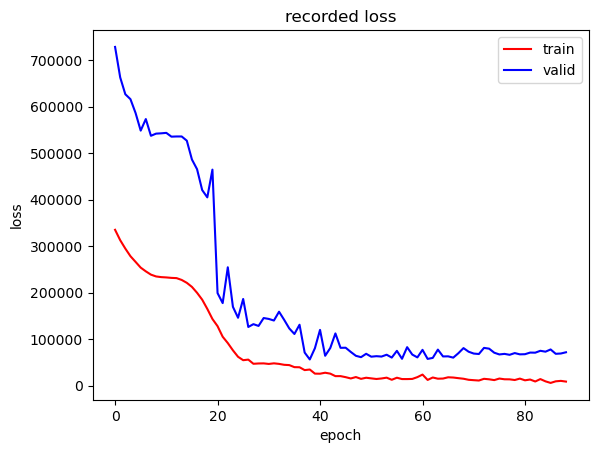

In [3]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_1')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=50, lr=1e-3, cosine_period=10, min_lr=1e-5, weight_decay=5*1e-3)

file = 'Model/predictor1_seed0_1.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 114.86, MAPE: 0.11
Testing set|RMSE: 223.70, MAPE: 0.21


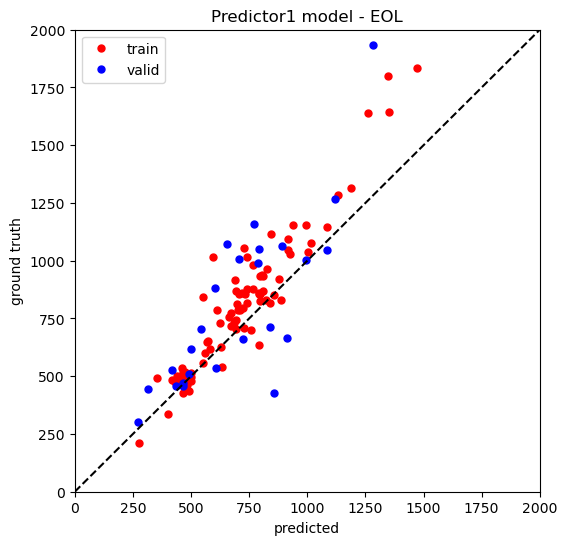

Training set|RMSE: 2.02, MAPE: 0.10
Testing set|RMSE: 2.84, MAPE: 0.14


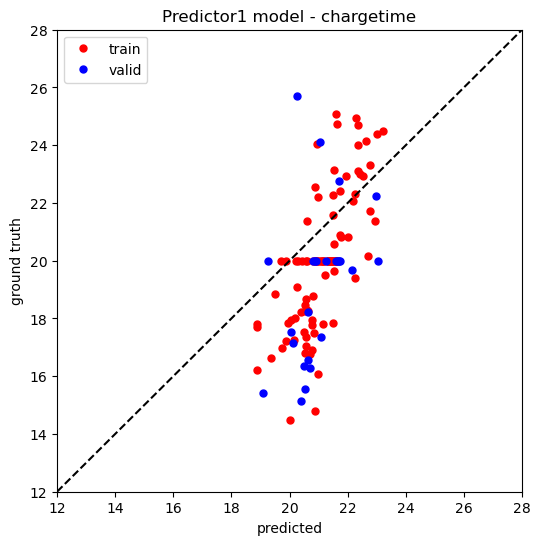

In [3]:
FILE = 'Model/predictor1_seed0_1.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, batch_size=5, model_num=1, cycle_length=100, set_code='seed0', pred_target='EOL')
model_evaluate(model, batch_size=5, model_num=1, cycle_length=100, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/500] train_loss: 339945.38, valid_loss: 760341.04
Validation loss decreased (inf --> 760341.040625).  Saving model ...
[Epoch 2/500] train_loss: 321950.16, valid_loss: 719416.47
Validation loss decreased (760341.040625 --> 719416.471875).  Saving model ...
[Epoch 3/500] train_loss: 305259.75, valid_loss: 659460.00
Validation loss decreased (719416.471875 --> 659460.000000).  Saving model ...
[Epoch 4/500] train_loss: 284668.78, valid_loss: 637174.62
Validation loss decreased (659460.000000 --> 637174.618750).  Saving model ...
[Epoch 5/500] train_loss: 269799.62, valid_loss: 590057.19
Validation loss decreased (637174.618750 --> 590057.187500).  Saving model ...
[Epoch 6/500] train_loss: 257713.81, valid_loss: 565839.96
Validation loss decreased (590057.187500 --> 565839.959375).  Saving model ...
[Epoch 7/500] train_loss: 250440.38, valid_loss: 560800.96
Validation loss decreased (565839.959375 --> 560800.957812).  Saving model ...
[Epoch 8/500] train_loss: 

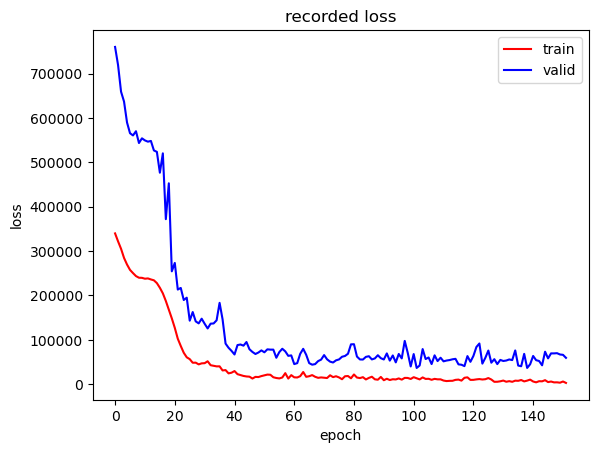

In [4]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_2')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=50, lr=1e-3, cosine_period=10, min_lr=1e-5, weight_decay=1e-3)

file = 'Model/predictor1_seed0_2.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 90.87, MAPE: 0.12
Testing set|RMSE: 187.43, MAPE: 0.22


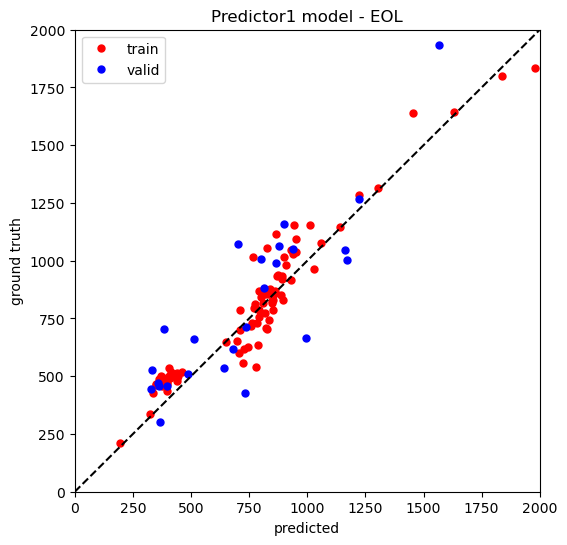

Training set|RMSE: 1.50, MAPE: 0.06
Testing set|RMSE: 1.73, MAPE: 0.08


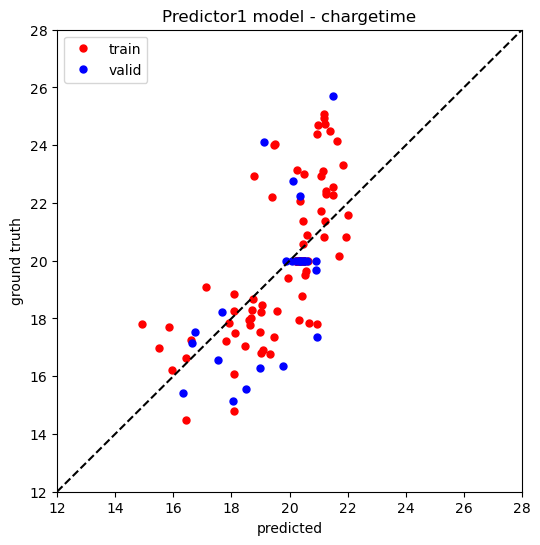

In [4]:
FILE = 'Model/predictor1_seed0_2.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, batch_size=5, model_num=1, cycle_length=100, set_code='seed0', pred_target='EOL')
model_evaluate(model, batch_size=5, model_num=1, cycle_length=100, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/500] train_loss: 332259.13, valid_loss: 741501.94
Validation loss decreased (inf --> 741501.943750).  Saving model ...
[Epoch 2/500] train_loss: 310245.13, valid_loss: 671144.47
Validation loss decreased (741501.943750 --> 671144.468750).  Saving model ...
[Epoch 3/500] train_loss: 293538.71, valid_loss: 615513.27
Validation loss decreased (671144.468750 --> 615513.265625).  Saving model ...
[Epoch 4/500] train_loss: 278718.09, valid_loss: 630351.44
EarlyStopping counter: 1 out of 50
[Epoch 5/500] train_loss: 265321.49, valid_loss: 586422.13
Validation loss decreased (615513.265625 --> 586422.131250).  Saving model ...
[Epoch 6/500] train_loss: 254069.96, valid_loss: 575900.50
Validation loss decreased (586422.131250 --> 575900.496875).  Saving model ...
[Epoch 7/500] train_loss: 244287.94, valid_loss: 563796.69
Validation loss decreased (575900.496875 --> 563796.693750).  Saving model ...
[Epoch 8/500] train_loss: 239000.48, valid_loss: 534616.06
Validation 

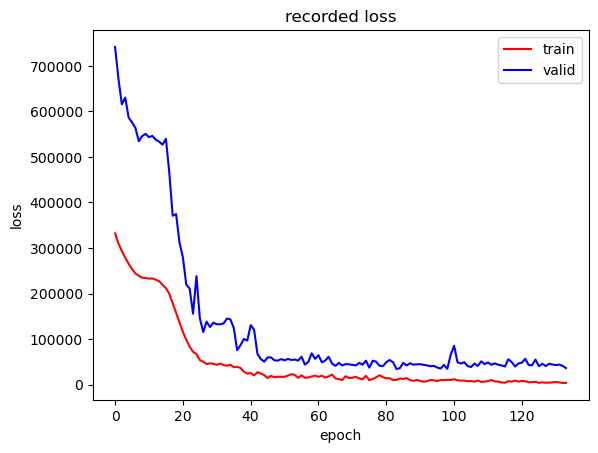

In [5]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_3')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=50, lr=1e-3, cosine_period=10, min_lr=1e-5, weight_decay=1e-4)

file = 'Model/predictor1_seed0_3.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 102.23, MAPE: 0.10
Testing set|RMSE: 165.40, MAPE: 0.21


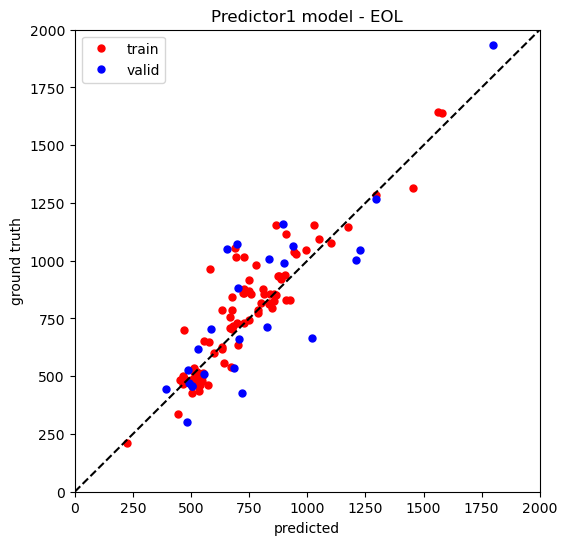

Training set|RMSE: 1.59, MAPE: 0.06
Testing set|RMSE: 1.76, MAPE: 0.08


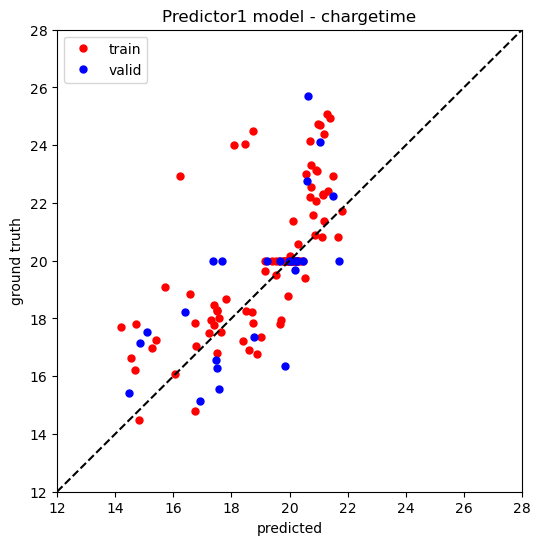

In [7]:
FILE = 'Model/predictor1_seed0_3.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, batch_size=5, model_num=1, cycle_length=100, set_code='seed0', pred_target='EOL')
model_evaluate(model, batch_size=5, model_num=1, cycle_length=100, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/500] train_loss: 335641.04, valid_loss: 749239.18
Validation loss decreased (inf --> 749239.184375).  Saving model ...
[Epoch 2/500] train_loss: 313165.98, valid_loss: 663645.45
Validation loss decreased (749239.184375 --> 663645.450000).  Saving model ...
[Epoch 3/500] train_loss: 294889.43, valid_loss: 624689.14
Validation loss decreased (663645.450000 --> 624689.140625).  Saving model ...
[Epoch 4/500] train_loss: 279346.44, valid_loss: 583237.85
Validation loss decreased (624689.140625 --> 583237.850000).  Saving model ...
[Epoch 5/500] train_loss: 263436.98, valid_loss: 576468.93
Validation loss decreased (583237.850000 --> 576468.934375).  Saving model ...
[Epoch 6/500] train_loss: 250952.33, valid_loss: 551861.86
Validation loss decreased (576468.934375 --> 551861.862500).  Saving model ...
[Epoch 7/500] train_loss: 242913.59, valid_loss: 525657.17
Validation loss decreased (551861.862500 --> 525657.173438).  Saving model ...
[Epoch 8/500] train_loss: 

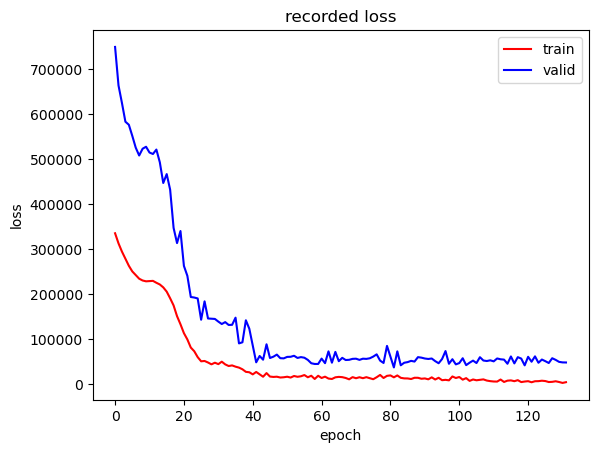

In [8]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_4')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=50, lr=1e-3, cosine_period=10, min_lr=1e-5, weight_decay=1e-5)

file = 'Model/predictor1_seed0_4.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 88.77, MAPE: 0.11
Testing set|RMSE: 184.15, MAPE: 0.22


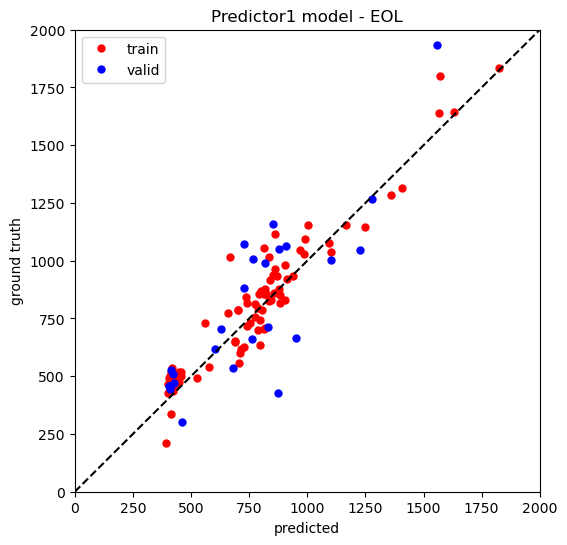

Training set|RMSE: 2.08, MAPE: 0.10
Testing set|RMSE: 2.89, MAPE: 0.15


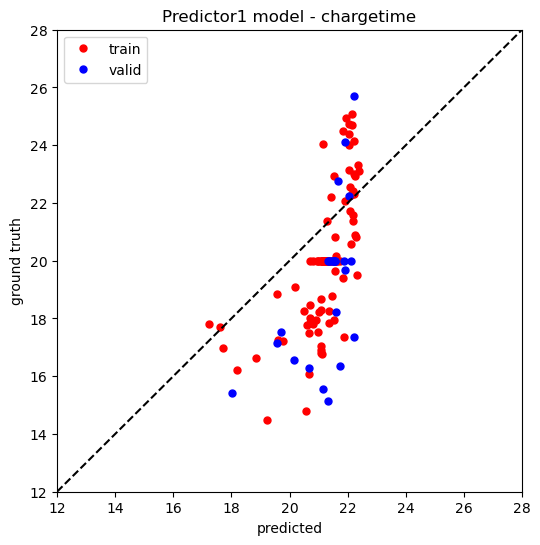

In [9]:
FILE = 'Model/predictor1_seed0_4.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, batch_size=5, model_num=1, cycle_length=100, set_code='seed0', pred_target='EOL')
model_evaluate(model, batch_size=5, model_num=1, cycle_length=100, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/500] train_loss: 336923.01, valid_loss: 745899.58
Validation loss decreased (inf --> 745899.581250).  Saving model ...
[Epoch 2/500] train_loss: 315951.27, valid_loss: 683687.59
Validation loss decreased (745899.581250 --> 683687.593750).  Saving model ...
[Epoch 3/500] train_loss: 297645.75, valid_loss: 612460.17
Validation loss decreased (683687.593750 --> 612460.171875).  Saving model ...
[Epoch 4/500] train_loss: 280961.93, valid_loss: 662610.11
EarlyStopping counter: 1 out of 100
[Epoch 5/500] train_loss: 267235.06, valid_loss: 623013.40
EarlyStopping counter: 2 out of 100
[Epoch 6/500] train_loss: 254542.14, valid_loss: 577680.98
Validation loss decreased (612460.171875 --> 577680.984375).  Saving model ...
[Epoch 7/500] train_loss: 245075.06, valid_loss: 486309.49
Validation loss decreased (577680.984375 --> 486309.485938).  Saving model ...
[Epoch 8/500] train_loss: 237181.65, valid_loss: 513929.43
EarlyStopping counter: 1 out of 100
[Epoch 9/500] tra

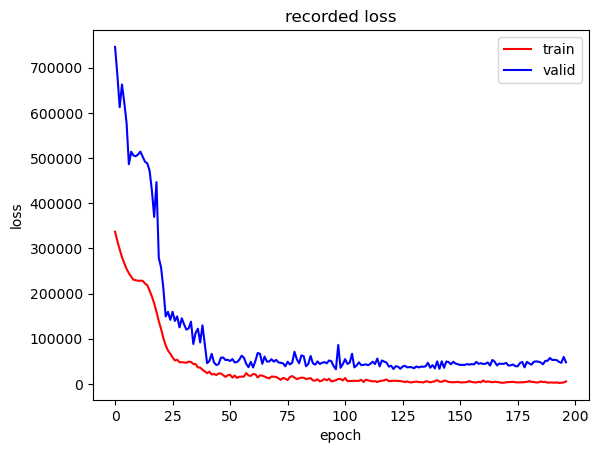

In [11]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_5')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=100, lr=1e-3, cosine_period=10, min_lr=1e-5, weight_decay=1e-4)

file = 'Model/predictor1_seed0_5.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 85.29, MAPE: 0.08
Testing set|RMSE: 155.68, MAPE: 0.21


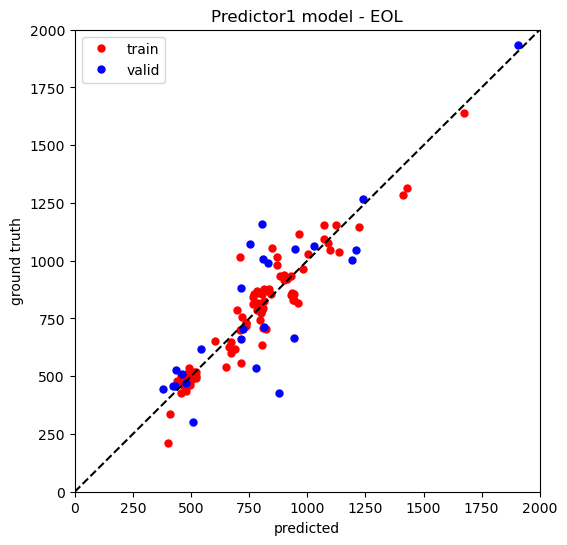

Training set|RMSE: 1.11, MAPE: 0.04
Testing set|RMSE: 1.84, MAPE: 0.09


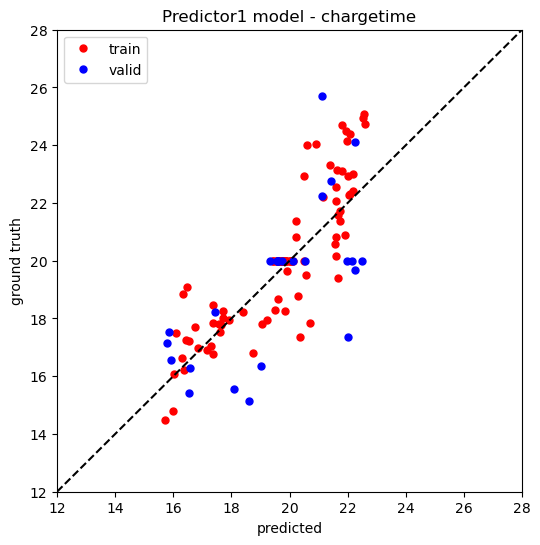

In [12]:
FILE = 'Model/predictor1_seed0_5.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, batch_size=5, model_num=1, cycle_length=100, set_code='seed0', pred_target='EOL')
model_evaluate(model, batch_size=5, model_num=1, cycle_length=100, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/500] train_loss: 330796.36, valid_loss: 729587.98
Validation loss decreased (inf --> 729587.984375).  Saving model ...
[Epoch 2/500] train_loss: 308218.61, valid_loss: 655345.67
Validation loss decreased (729587.984375 --> 655345.665625).  Saving model ...
[Epoch 3/500] train_loss: 292409.76, valid_loss: 645737.49
Validation loss decreased (655345.665625 --> 645737.493750).  Saving model ...
[Epoch 4/500] train_loss: 276603.52, valid_loss: 602262.30
Validation loss decreased (645737.493750 --> 602262.296875).  Saving model ...
[Epoch 5/500] train_loss: 262278.83, valid_loss: 575308.22
Validation loss decreased (602262.296875 --> 575308.218750).  Saving model ...
[Epoch 6/500] train_loss: 249207.22, valid_loss: 536325.42
Validation loss decreased (575308.218750 --> 536325.418750).  Saving model ...
[Epoch 7/500] train_loss: 239257.37, valid_loss: 535147.62
Validation loss decreased (536325.418750 --> 535147.615625).  Saving model ...
[Epoch 8/500] train_loss: 

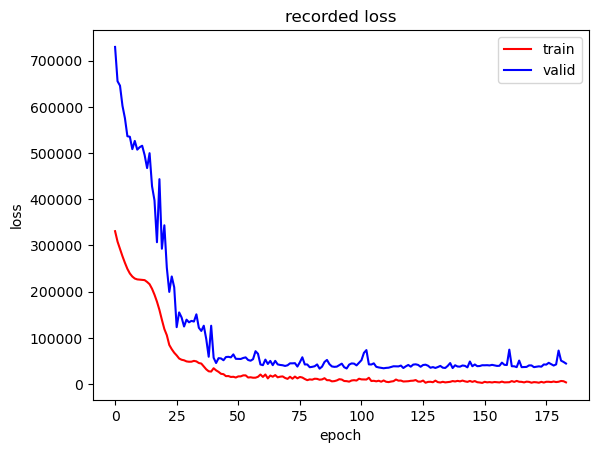

In [14]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_6')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=100, lr=1e-3, cosine_period=10, min_lr=1e-6, weight_decay=1e-4)

file = 'Model/predictor1_seed0_6.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 73.92, MAPE: 0.08
Testing set|RMSE: 171.06, MAPE: 0.20


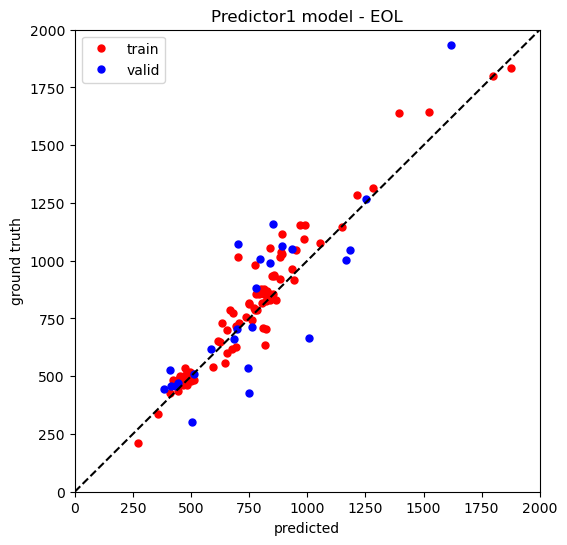

Training set|RMSE: 1.82, MAPE: 0.07
Testing set|RMSE: 1.86, MAPE: 0.08


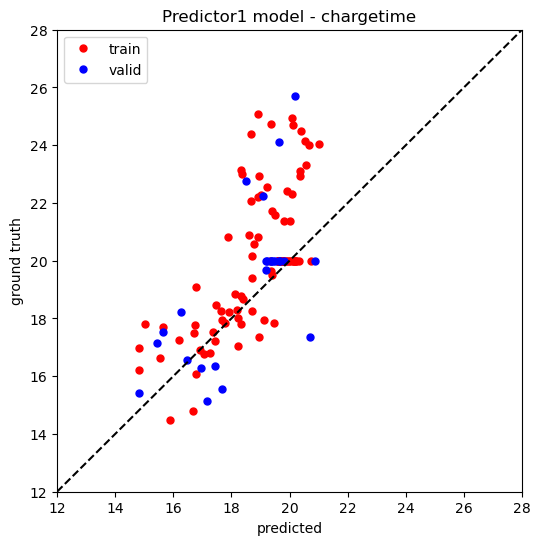

In [15]:
FILE = 'Model/predictor1_seed0_6.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, batch_size=5, model_num=1, cycle_length=100, set_code='seed0', pred_target='EOL')
model_evaluate(model, batch_size=5, model_num=1, cycle_length=100, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/500] train_loss: 332931.24, valid_loss: 727980.55
Validation loss decreased (inf --> 727980.546875).  Saving model ...
[Epoch 2/500] train_loss: 308469.88, valid_loss: 643405.32
Validation loss decreased (727980.546875 --> 643405.321875).  Saving model ...
[Epoch 3/500] train_loss: 288162.73, valid_loss: 603229.50
Validation loss decreased (643405.321875 --> 603229.496875).  Saving model ...
[Epoch 4/500] train_loss: 269954.33, valid_loss: 601540.00
Validation loss decreased (603229.496875 --> 601540.000000).  Saving model ...
[Epoch 5/500] train_loss: 251842.91, valid_loss: 533650.93
Validation loss decreased (601540.000000 --> 533650.925000).  Saving model ...
[Epoch 6/500] train_loss: 232433.98, valid_loss: 482202.25
Validation loss decreased (533650.925000 --> 482202.251563).  Saving model ...
[Epoch 7/500] train_loss: 212586.24, valid_loss: 446230.20
Validation loss decreased (482202.251563 --> 446230.200000).  Saving model ...
[Epoch 8/500] train_loss: 

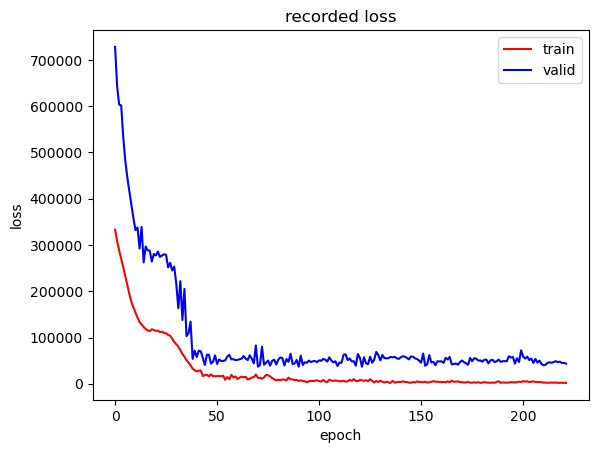

In [28]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_7')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            patience=100, lr=1e-3, cosine_period=20, min_lr=1e-5, weight_decay=1e-4)

file = 'Model/predictor1_seed0_7.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 83.66, MAPE: 0.08
Testing set|RMSE: 177.96, MAPE: 0.23


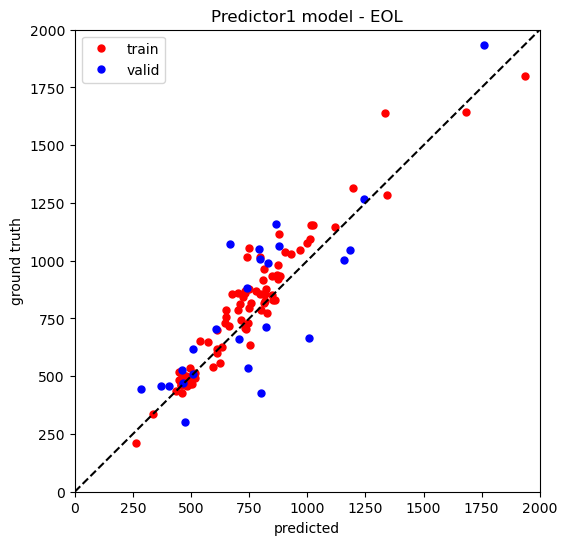

Training set|RMSE: 1.59, MAPE: 0.07
Testing set|RMSE: 2.25, MAPE: 0.11


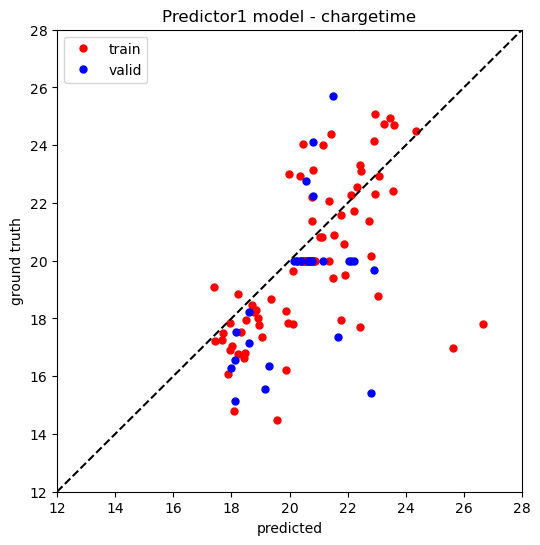

In [29]:
FILE = 'Model/predictor1_seed0_7.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, batch_size=5, model_num=1, cycle_length=100, set_code='seed0', pred_target='EOL')
model_evaluate(model, batch_size=5, model_num=1, cycle_length=100, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/1000] train_loss: 334605.34, valid_loss: 735298.78
Validation loss decreased (inf --> 735298.775000).  Saving model ...
[Epoch 2/1000] train_loss: 310154.97, valid_loss: 696668.81
Validation loss decreased (735298.775000 --> 696668.809375).  Saving model ...
[Epoch 3/1000] train_loss: 293140.24, valid_loss: 551990.03
Validation loss decreased (696668.809375 --> 551990.031250).  Saving model ...
[Epoch 4/1000] train_loss: 275653.29, valid_loss: 576326.32
EarlyStopping counter: 1 out of 100
[Epoch 5/1000] train_loss: 258949.07, valid_loss: 531791.13
Validation loss decreased (551990.031250 --> 531791.131250).  Saving model ...
[Epoch 6/1000] train_loss: 240261.00, valid_loss: 520960.56
Validation loss decreased (531791.131250 --> 520960.562500).  Saving model ...
[Epoch 7/1000] train_loss: 219392.67, valid_loss: 482045.48
Validation loss decreased (520960.562500 --> 482045.484375).  Saving model ...
[Epoch 8/1000] train_loss: 201287.05, valid_loss: 471711.28
Va

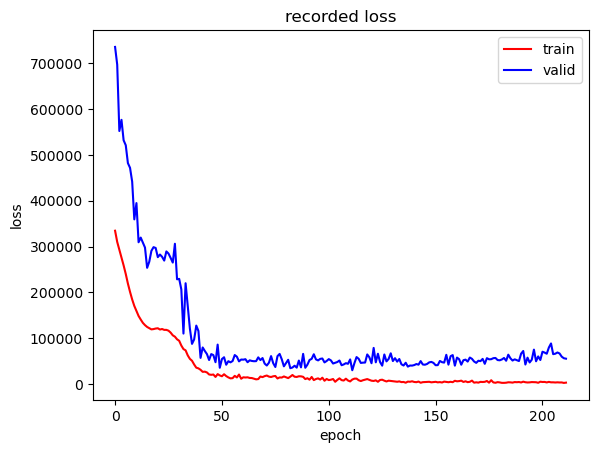

In [30]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_8')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            num_epochs=1000, patience=100, lr=1e-3, cosine_period=20, min_lr=1e-6, weight_decay=1e-4)

file = 'Model/predictor1_seed0_8.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 94.18, MAPE: 0.08
Testing set|RMSE: 174.43, MAPE: 0.18


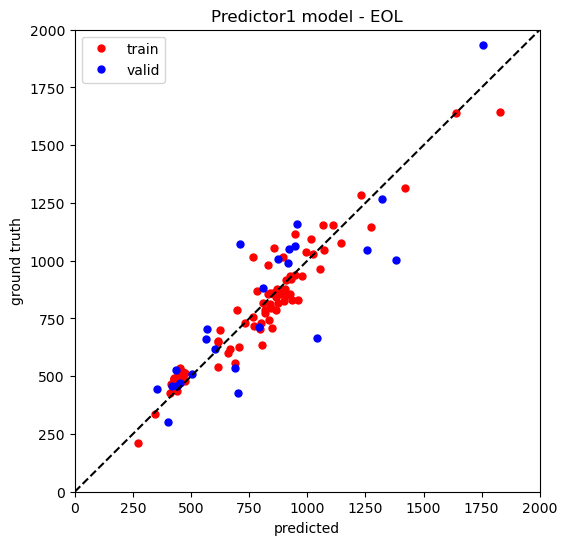

Training set|RMSE: 1.45, MAPE: 0.05
Testing set|RMSE: 1.57, MAPE: 0.06


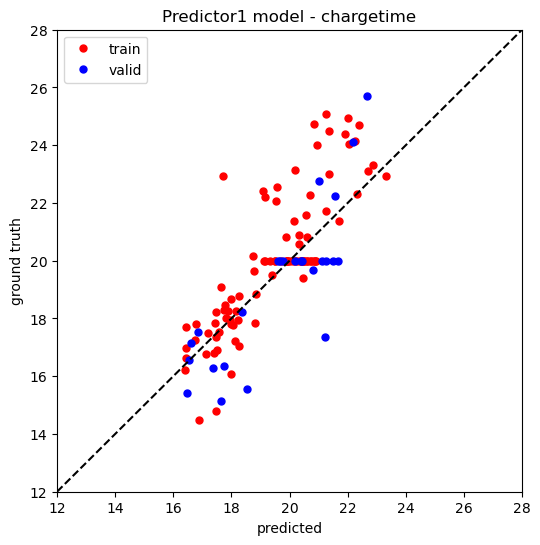

In [4]:
FILE = 'Model/predictor1_seed0_8.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, model_num=1, cycle_length=100, set_code='seed0', pred_target='EOL')
model_evaluate(model, model_num=1, cycle_length=100, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/1000] train_loss: 334505.19, valid_loss: 750802.90
Validation loss decreased (inf --> 750802.903125).  Saving model ...
[Epoch 2/1000] train_loss: 316091.89, valid_loss: 677892.21
Validation loss decreased (750802.903125 --> 677892.212500).  Saving model ...
[Epoch 3/1000] train_loss: 294125.06, valid_loss: 582209.66
Validation loss decreased (677892.212500 --> 582209.656250).  Saving model ...
[Epoch 4/1000] train_loss: 276289.52, valid_loss: 585059.05
EarlyStopping counter: 1 out of 100
[Epoch 5/1000] train_loss: 263484.11, valid_loss: 622163.52
EarlyStopping counter: 2 out of 100
[Epoch 6/1000] train_loss: 240215.24, valid_loss: 500048.38
Validation loss decreased (582209.656250 --> 500048.381250).  Saving model ...
[Epoch 7/1000] train_loss: 214905.90, valid_loss: 444864.25
Validation loss decreased (500048.381250 --> 444864.254688).  Saving model ...
[Epoch 8/1000] train_loss: 192933.34, valid_loss: 420690.72
Validation loss decreased (444864.254688 --> 

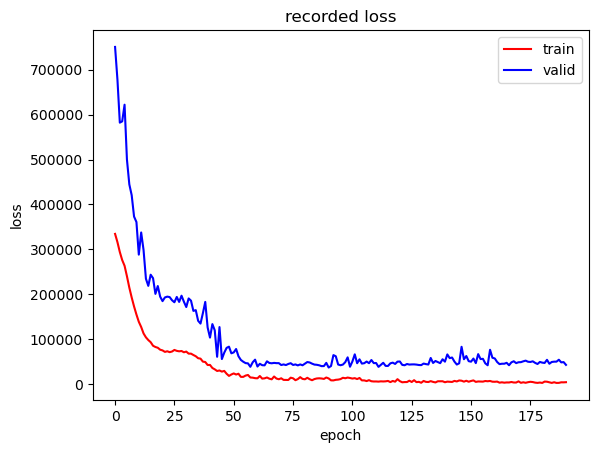

In [5]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_9')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            num_epochs=1000, patience=100, lr=1e-3, cosine_period=25, min_lr=1e-6, weight_decay=1e-4)

file = 'Model/predictor1_seed0_9.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 107.20, MAPE: 0.08
Testing set|RMSE: 192.11, MAPE: 0.22


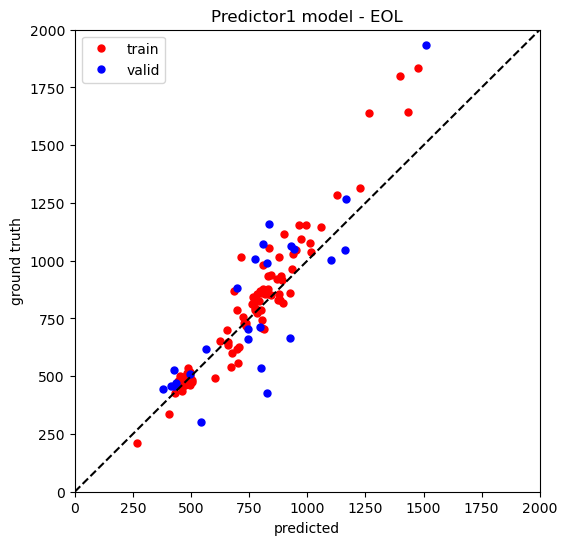

Training set|RMSE: 1.76, MAPE: 0.07
Testing set|RMSE: 2.03, MAPE: 0.08


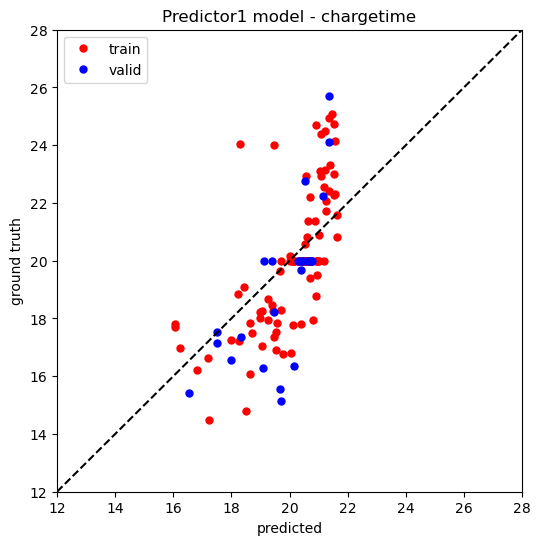

In [6]:
FILE = 'Model/predictor1_seed0_9.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, model_num=1, cycle_length=100, set_code='seed0', pred_target='EOL')
model_evaluate(model, model_num=1, cycle_length=100, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/1000] train_loss: 333675.92, valid_loss: 732952.97
Validation loss decreased (inf --> 732952.975000).  Saving model ...
[Epoch 2/1000] train_loss: 312927.44, valid_loss: 668886.33
Validation loss decreased (732952.975000 --> 668886.328125).  Saving model ...
[Epoch 3/1000] train_loss: 292579.62, valid_loss: 610574.79
Validation loss decreased (668886.328125 --> 610574.787500).  Saving model ...
[Epoch 4/1000] train_loss: 274768.17, valid_loss: 615040.07
EarlyStopping counter: 1 out of 100
[Epoch 5/1000] train_loss: 254321.22, valid_loss: 565386.66
Validation loss decreased (610574.787500 --> 565386.656250).  Saving model ...
[Epoch 6/1000] train_loss: 234834.71, valid_loss: 503048.41
Validation loss decreased (565386.656250 --> 503048.412500).  Saving model ...
[Epoch 7/1000] train_loss: 217886.97, valid_loss: 486831.11
Validation loss decreased (503048.412500 --> 486831.114063).  Saving model ...
[Epoch 8/1000] train_loss: 196715.68, valid_loss: 486309.05
Va

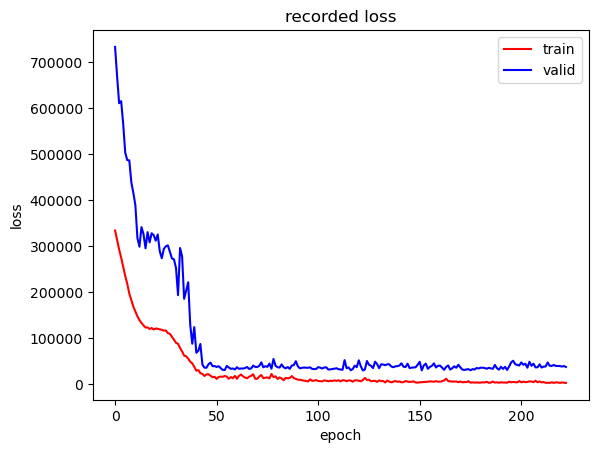

In [7]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_10')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            num_epochs=1000, patience=100, lr=1e-3, cosine_period=20, min_lr=1e-6, weight_decay=1e-5)

file = 'Model/predictor1_seed0_10.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 106.93, MAPE: 0.09
Testing set|RMSE: 171.58, MAPE: 0.19


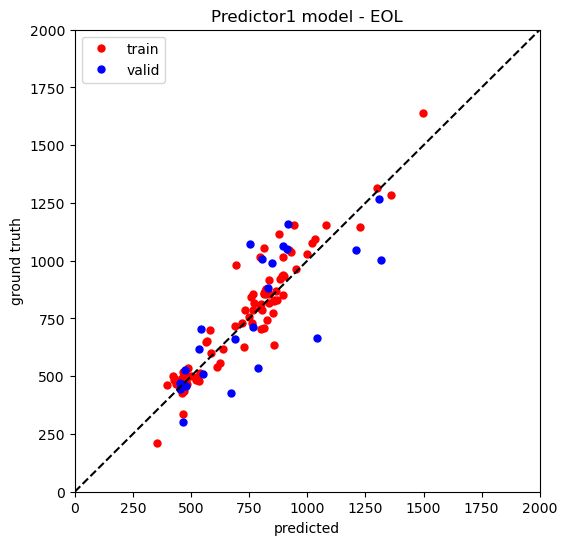

Training set|RMSE: 1.31, MAPE: 0.05
Testing set|RMSE: 1.73, MAPE: 0.07


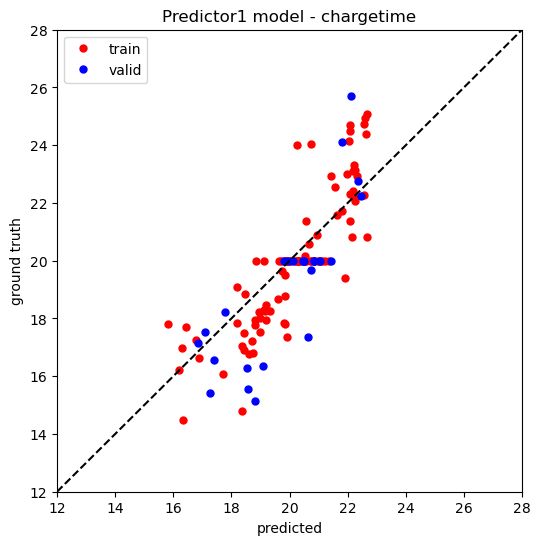

In [8]:
FILE = 'Model/predictor1_seed0_10.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, model_num=10, cycle_length=100, set_code='seed0', pred_target='EOL')
model_evaluate(model, model_num=10, cycle_length=100, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/1000] train_loss: 329626.43, valid_loss: 720793.63
Validation loss decreased (inf --> 720793.628125).  Saving model ...
[Epoch 2/1000] train_loss: 305426.42, valid_loss: 643430.32
Validation loss decreased (720793.628125 --> 643430.315625).  Saving model ...
[Epoch 3/1000] train_loss: 286894.10, valid_loss: 578387.83
Validation loss decreased (643430.315625 --> 578387.828125).  Saving model ...
[Epoch 4/1000] train_loss: 270527.35, valid_loss: 572784.29
Validation loss decreased (578387.828125 --> 572784.287500).  Saving model ...
[Epoch 5/1000] train_loss: 253072.87, valid_loss: 545794.12
Validation loss decreased (572784.287500 --> 545794.121875).  Saving model ...
[Epoch 6/1000] train_loss: 236591.80, valid_loss: 507148.60
Validation loss decreased (545794.121875 --> 507148.604687).  Saving model ...
[Epoch 7/1000] train_loss: 220223.84, valid_loss: 521638.67
EarlyStopping counter: 1 out of 100
[Epoch 8/1000] train_loss: 201962.99, valid_loss: 443871.03
Va

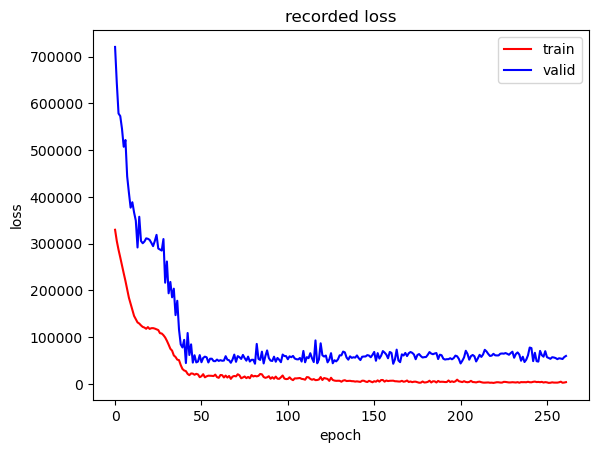

In [11]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_11')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            num_epochs=1000, patience=100, lr=1e-3, cosine_period=20, min_lr=1e-6, weight_decay=1e-6)

file = 'Model/predictor1_seed0_11.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

cuda is available
[Epoch 1/1000] train_loss: 330694.09, valid_loss: 721485.18
Validation loss decreased (inf --> 721485.181250).  Saving model ...
[Epoch 2/1000] train_loss: 306009.69, valid_loss: 651442.85
Validation loss decreased (721485.181250 --> 651442.853125).  Saving model ...
[Epoch 3/1000] train_loss: 291762.22, valid_loss: 624713.98
Validation loss decreased (651442.853125 --> 624713.978125).  Saving model ...
[Epoch 4/1000] train_loss: 282693.17, valid_loss: 618611.71
Validation loss decreased (624713.978125 --> 618611.712500).  Saving model ...
[Epoch 5/1000] train_loss: 277325.86, valid_loss: 614369.25
Validation loss decreased (618611.712500 --> 614369.246875).  Saving model ...
[Epoch 6/1000] train_loss: 275846.94, valid_loss: 608823.35
Validation loss decreased (614369.246875 --> 608823.353125).  Saving model ...
[Epoch 7/1000] train_loss: 275141.85, valid_loss: 611781.98
EarlyStopping counter: 1 out of 100
[Epoch 8/1000] train_loss: 272087.92, valid_loss: 600179.13
Va

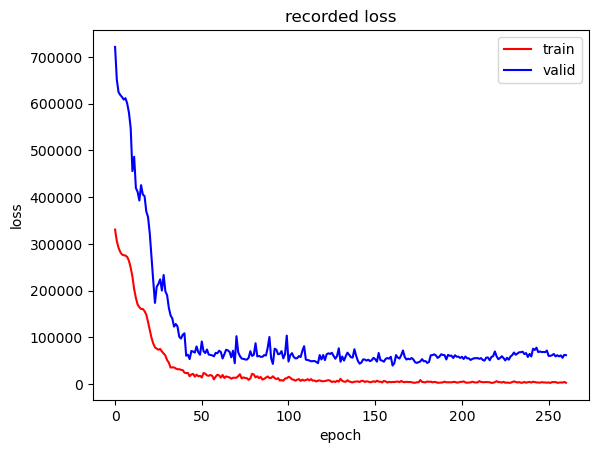

In [13]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_12')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            num_epochs=1000, patience=100, lr=1e-3, cosine_period=5, min_lr=1e-6, weight_decay=1e-5)

file = 'Model/predictor1_seed0_12.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

cuda is available
[Epoch 1/1000] train_loss: 328093.64, valid_loss: 722609.59
Validation loss decreased (inf --> 722609.587500).  Saving model ...
[Epoch 2/1000] train_loss: 303712.69, valid_loss: 659693.27
Validation loss decreased (722609.587500 --> 659693.265625).  Saving model ...
[Epoch 3/1000] train_loss: 284844.54, valid_loss: 619306.93
Validation loss decreased (659693.265625 --> 619306.934375).  Saving model ...
[Epoch 4/1000] train_loss: 267068.21, valid_loss: 557825.31
Validation loss decreased (619306.934375 --> 557825.306250).  Saving model ...
[Epoch 5/1000] train_loss: 248141.13, valid_loss: 523118.55
Validation loss decreased (557825.306250 --> 523118.546875).  Saving model ...
[Epoch 6/1000] train_loss: 229869.64, valid_loss: 477986.55
Validation loss decreased (523118.546875 --> 477986.551563).  Saving model ...
[Epoch 7/1000] train_loss: 210043.71, valid_loss: 417111.52
Validation loss decreased (477986.551563 --> 417111.523438).  Saving model ...
[Epoch 8/1000] trai

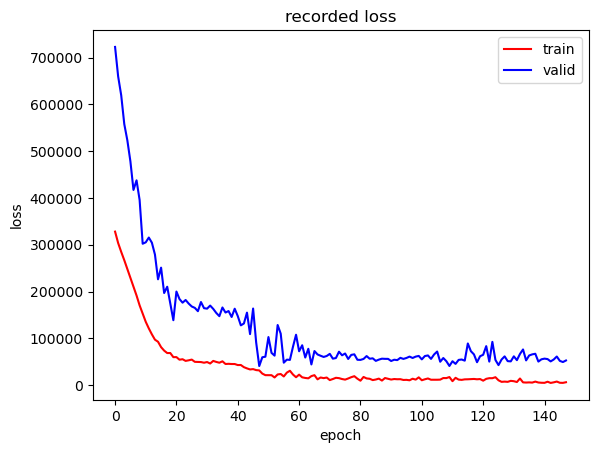

In [14]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_13')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            num_epochs=1000, patience=100, lr=1e-3, cosine_period=30, min_lr=1e-6, weight_decay=1e-5)

file = 'Model/predictor1_seed0_13.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

cuda is available
[Epoch 1/1000] train_loss: 337922.65, valid_loss: 753610.90
Validation loss decreased (inf --> 753610.900000).  Saving model ...
[Epoch 2/1000] train_loss: 320041.40, valid_loss: 702055.55
Validation loss decreased (753610.900000 --> 702055.550000).  Saving model ...
[Epoch 3/1000] train_loss: 304871.52, valid_loss: 662975.61
Validation loss decreased (702055.550000 --> 662975.606250).  Saving model ...
[Epoch 4/1000] train_loss: 294462.95, valid_loss: 646814.81
Validation loss decreased (662975.606250 --> 646814.809375).  Saving model ...
[Epoch 5/1000] train_loss: 286120.28, valid_loss: 632715.05
Validation loss decreased (646814.809375 --> 632715.053125).  Saving model ...
[Epoch 6/1000] train_loss: 276844.58, valid_loss: 594926.41
Validation loss decreased (632715.053125 --> 594926.406250).  Saving model ...
[Epoch 7/1000] train_loss: 268927.34, valid_loss: 597131.41
EarlyStopping counter: 1 out of 100
[Epoch 8/1000] train_loss: 262385.84, valid_loss: 593120.55
Va

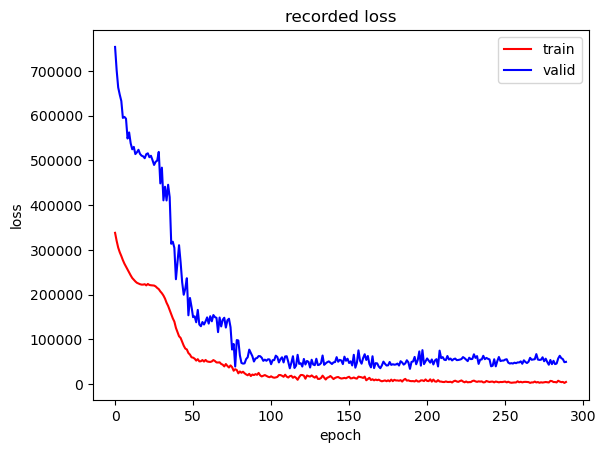

In [16]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_14')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            num_epochs=1000, patience=100, lr=5*1e-4, cosine_period=20, min_lr=1e-6, weight_decay=1e-5)

file = 'Model/predictor1_seed0_14.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 128.36, MAPE: 0.07
Testing set|RMSE: 183.72, MAPE: 0.20


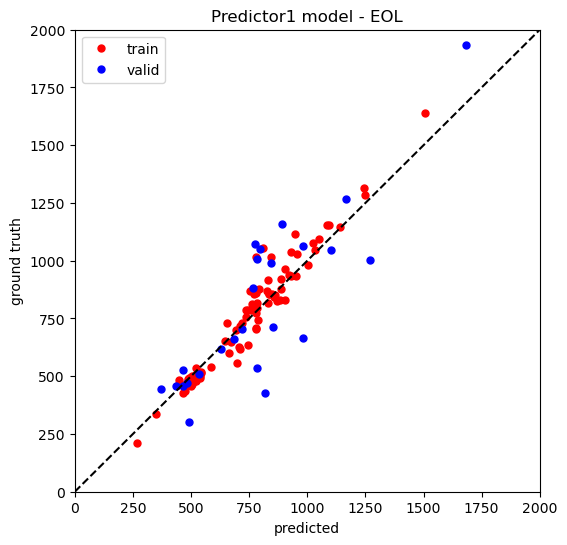

Training set|RMSE: 1.15, MAPE: 0.04
Testing set|RMSE: 1.71, MAPE: 0.07


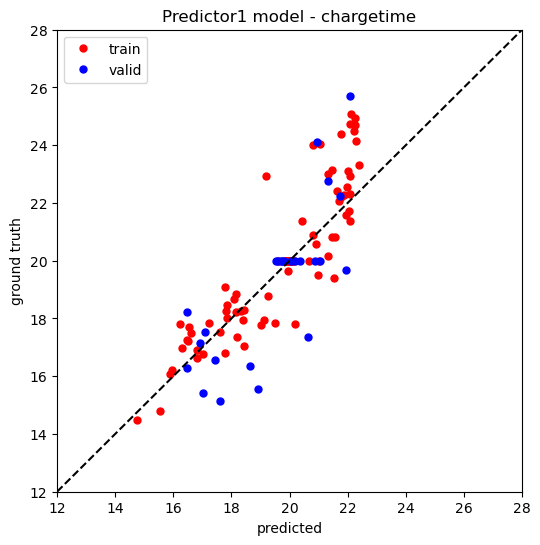

In [17]:
FILE = 'Model/predictor1_seed0_14.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, model_num=14, cycle_length=100, set_code='seed0', pred_target='EOL')
model_evaluate(model, model_num=14, cycle_length=100, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/1000] train_loss: 341811.42, valid_loss: 763941.32
Validation loss decreased (inf --> 763941.315625).  Saving model ...
[Epoch 2/1000] train_loss: 330236.27, valid_loss: 715094.81
Validation loss decreased (763941.315625 --> 715094.806250).  Saving model ...
[Epoch 3/1000] train_loss: 318257.46, valid_loss: 689331.05
Validation loss decreased (715094.806250 --> 689331.053125).  Saving model ...
[Epoch 4/1000] train_loss: 309230.43, valid_loss: 672287.55
Validation loss decreased (689331.053125 --> 672287.546875).  Saving model ...
[Epoch 5/1000] train_loss: 301867.32, valid_loss: 651528.42
Validation loss decreased (672287.546875 --> 651528.421875).  Saving model ...
[Epoch 6/1000] train_loss: 296913.51, valid_loss: 645845.25
Validation loss decreased (651528.421875 --> 645845.246875).  Saving model ...
[Epoch 7/1000] train_loss: 293070.79, valid_loss: 643066.23
Validation loss decreased (645845.246875 --> 643066.228125).  Saving model ...
[Epoch 8/1000] trai

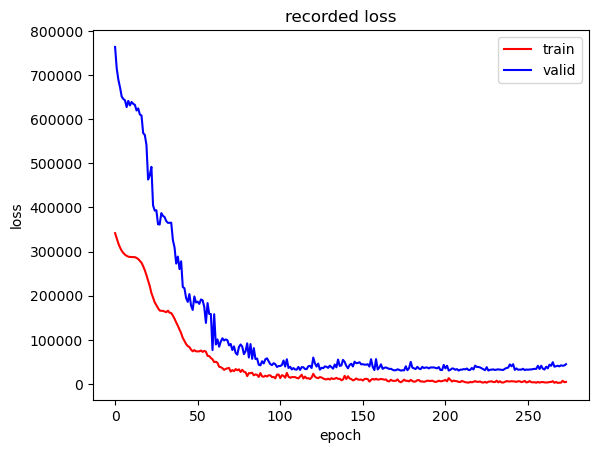

In [18]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_15')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            num_epochs=1000, patience=100, lr=5*1e-4, cosine_period=10, min_lr=1e-6, weight_decay=1e-5)

file = 'Model/predictor1_seed0_15.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 106.15, MAPE: 0.07
Testing set|RMSE: 173.82, MAPE: 0.20


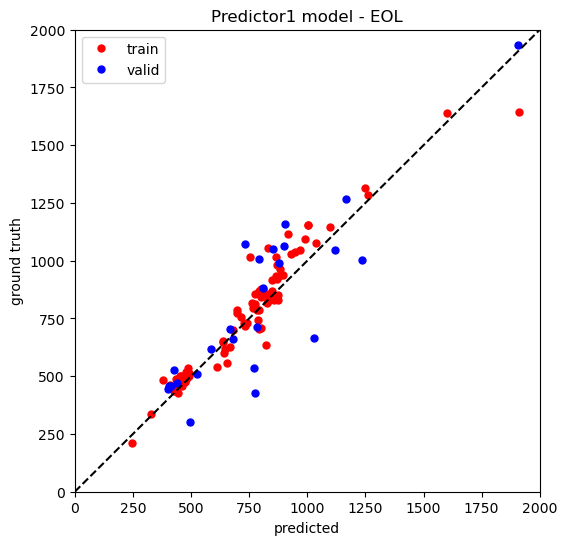

Training set|RMSE: 1.10, MAPE: 0.04
Testing set|RMSE: 1.82, MAPE: 0.08


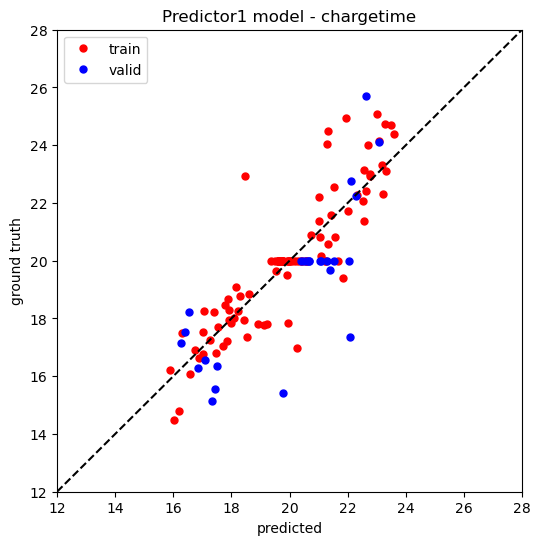

In [19]:
FILE = 'Model/predictor1_seed0_15.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, model_num=15, cycle_length=100, set_code='seed0', pred_target='EOL')
model_evaluate(model, model_num=15, cycle_length=100, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/1000] train_loss: 335992.45, valid_loss: 757997.05
Validation loss decreased (inf --> 757997.046875).  Saving model ...
[Epoch 2/1000] train_loss: 321530.87, valid_loss: 690296.19
Validation loss decreased (757997.046875 --> 690296.193750).  Saving model ...
[Epoch 3/1000] train_loss: 309937.11, valid_loss: 700751.43
EarlyStopping counter: 1 out of 100
[Epoch 4/1000] train_loss: 300432.00, valid_loss: 685596.60
Validation loss decreased (690296.193750 --> 685596.596875).  Saving model ...
[Epoch 5/1000] train_loss: 294347.23, valid_loss: 673572.97
Validation loss decreased (685596.596875 --> 673572.968750).  Saving model ...
[Epoch 6/1000] train_loss: 288004.54, valid_loss: 668662.99
Validation loss decreased (673572.968750 --> 668662.990625).  Saving model ...
[Epoch 7/1000] train_loss: 284518.40, valid_loss: 630795.08
Validation loss decreased (668662.990625 --> 630795.081250).  Saving model ...
[Epoch 8/1000] train_loss: 282023.80, valid_loss: 646083.27
Ea

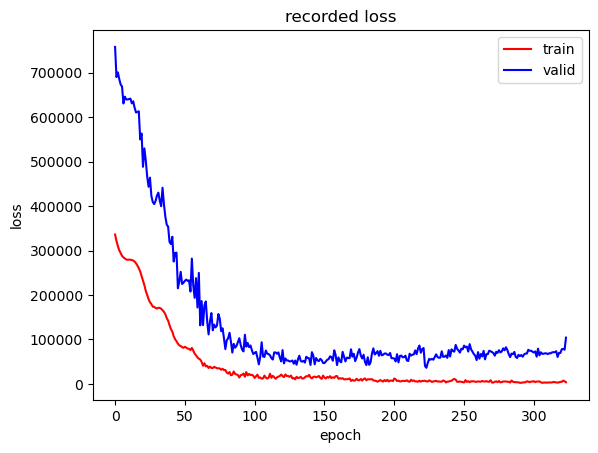

In [20]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_16')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            num_epochs=1000, patience=100, lr=5*1e-4, cosine_period=10, min_lr=1e-6, weight_decay=1e-3)

file = 'Model/predictor1_seed0_16.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

Training set|RMSE: 79.08, MAPE: 0.07
Testing set|RMSE: 190.14, MAPE: 0.23


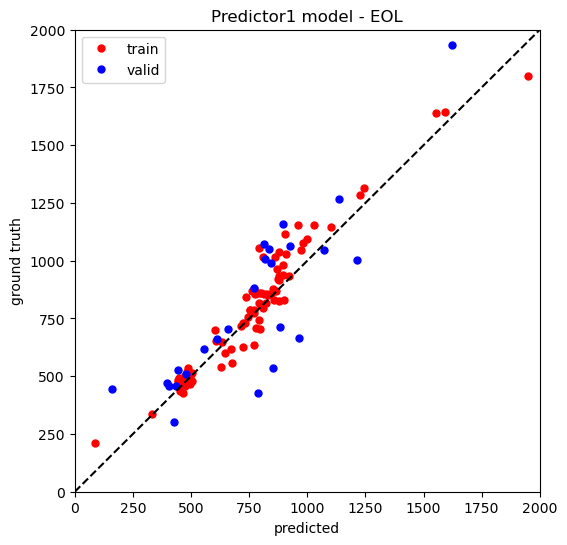

Training set|RMSE: 1.85, MAPE: 0.06
Testing set|RMSE: 1.98, MAPE: 0.08


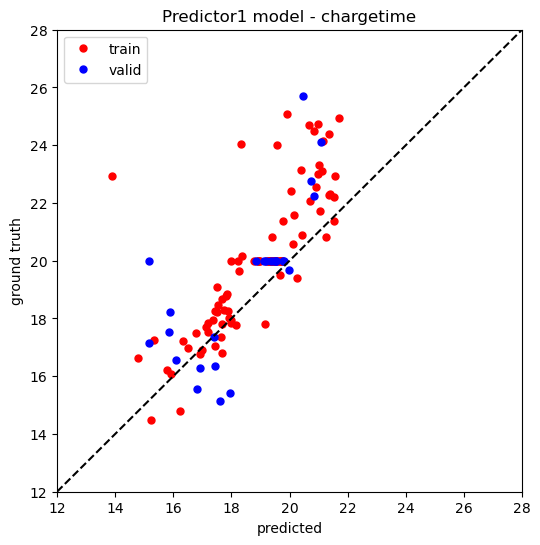

In [21]:
FILE = 'Model/predictor1_seed0_16.pth'
model = torch.load(FILE)
model.eval()
model_evaluate(model, model_num=16, cycle_length=100, set_code='seed0', pred_target='EOL')
model_evaluate(model, model_num=16, cycle_length=100, set_code='seed0', pred_target='chargetime')

cuda is available
[Epoch 1/1000] train_loss: 338578.52, valid_loss: 762266.32
Validation loss decreased (inf --> 762266.315625).  Saving model ...
[Epoch 2/1000] train_loss: 325026.28, valid_loss: 725034.83
Validation loss decreased (762266.315625 --> 725034.834375).  Saving model ...
[Epoch 3/1000] train_loss: 311179.02, valid_loss: 681229.62
Validation loss decreased (725034.834375 --> 681229.621875).  Saving model ...
[Epoch 4/1000] train_loss: 304237.40, valid_loss: 688992.07
EarlyStopping counter: 1 out of 100
[Epoch 5/1000] train_loss: 295609.92, valid_loss: 666711.84
Validation loss decreased (681229.621875 --> 666711.843750).  Saving model ...
[Epoch 6/1000] train_loss: 289649.78, valid_loss: 670992.08
EarlyStopping counter: 1 out of 100
[Epoch 7/1000] train_loss: 285412.76, valid_loss: 644485.65
Validation loss decreased (666711.843750 --> 644485.646875).  Saving model ...
[Epoch 8/1000] train_loss: 282876.53, valid_loss: 649719.09
EarlyStopping counter: 1 out of 100
[Epoch 9/

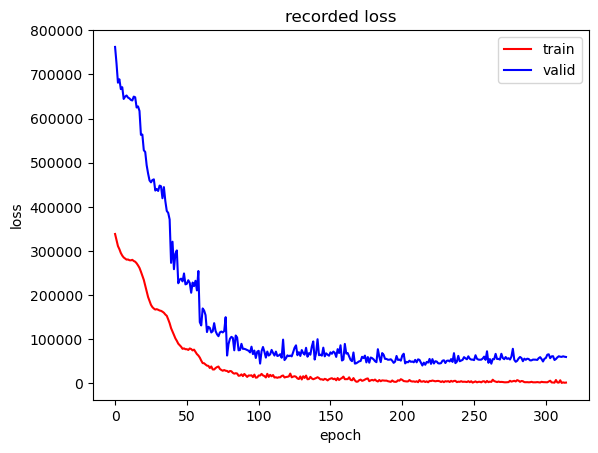

In [22]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_17')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            num_epochs=1000, patience=100, lr=5*1e-4, cosine_period=10, min_lr=1e-6, weight_decay=1e-6)

file = 'Model/predictor1_seed0_17.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)

cuda is available
[Epoch 1/1000] train_loss: 339402.91, valid_loss: 761928.94
Validation loss decreased (inf --> 761928.937500).  Saving model ...
[Epoch 2/1000] train_loss: 326133.76, valid_loss: 725480.82
Validation loss decreased (761928.937500 --> 725480.815625).  Saving model ...
[Epoch 3/1000] train_loss: 313971.34, valid_loss: 675039.26
Validation loss decreased (725480.815625 --> 675039.262500).  Saving model ...
[Epoch 4/1000] train_loss: 304911.66, valid_loss: 678131.02
EarlyStopping counter: 1 out of 100
[Epoch 5/1000] train_loss: 298462.48, valid_loss: 665487.84
Validation loss decreased (675039.262500 --> 665487.843750).  Saving model ...
[Epoch 6/1000] train_loss: 292256.17, valid_loss: 668610.78
EarlyStopping counter: 1 out of 100
[Epoch 7/1000] train_loss: 288147.68, valid_loss: 656976.51
Validation loss decreased (665487.843750 --> 656976.512500).  Saving model ...
[Epoch 8/1000] train_loss: 284728.34, valid_loss: 644806.20
Validation loss decreased (656976.512500 --> 

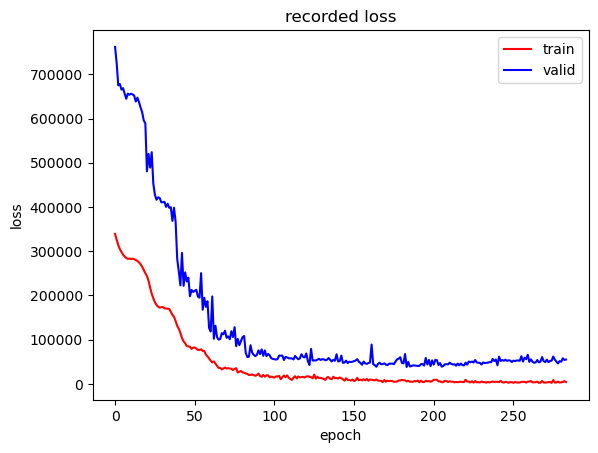

In [24]:
# TensorBoard
writer = SummaryWriter('runs/predictor1_seed0_18')
# load model
model = Predictor_1(in_ch=8, out_ch=1).cuda()

model, train_loss, valid_loss = train_model(model, writer, train_loader, test_loader,
                                            num_epochs=1000, patience=100, lr=5*1e-4, cosine_period=10, min_lr=1e-6, weight_decay=1e-5)

file = 'Model/predictor1_seed0_18.pth'
torch.save(model, file)
print(file)

loss_plot(train_loss, valid_loss)